#  Пронозирование удоя и вкуса молока. Проект по спринту "Линейные модели в машинном обучении".

## 1. Описание проекта

К нам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а надой был вкусным — строго по его критериям, ничуть не хуже.
Необходимо разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах.
Нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1. Первая будет прогнозировать возможный удой у коровы (целевой признак Удой);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
- Средний удой за год — не менее 6000 килограммов,
- Молоко должно быть вкусным.

## 2. Описание данных

Описание данных:

- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание таблицы:
###### Параметры корма коровы
- ЭКЕ (Энергетическая кормовая единица) — измерение питательности корма коровы;
- Сырой протеин — содержание сырого протеина в корме, в граммах;
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
###### Где паслась корова
- Тип пастбища — ландшафт лугов, на которых паслась корова.
###### Особенности коровы
- id — номер коровы;
- Порода — порода коровы;
- Возраст — бинарный признак (менее_2_лет, более_2_лет);
- Имя Папы — порода папы коровы.
###### Характеристики молока
- Жирность — содержание жиров в молоке, в процентах;
- Белок — содержание белков в молоке, в процентах;
- Вкус молока — оценка вкуса по личным критериям фермера;
- Удой — масса молока, которую корова даёт в год, в килограммах.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера.
Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Структура таблицы почти аналогична ferma_main.csv, кроме нескольких особенностей:
- Белок и Жирность молока указаны на момент покупки — когда «ЭкоФерма» давала им свой корм.
- Параметры кормления ЭКЕ, Сырой протеин, СПО отсутствуют. Недавно технологи заказчика пересмотрели параметры корма и планируют их внедрить после расширения стада. Именно новые параметры нужно использовать, когда вы будете применять предсказательные модели к бурёнкам «ЭкоФермы». По новой схеме фермер планирует увеличить средние значения ЭКЕ, Сырой протеин, СПО на 5%.
- Удой и Вкус молока неизвестны — именно их и предстоит предсказать!

## 3. План работы

###### Шаг 1. Загрузите и изучите данные
1. Скачайте файлы и добавьте их датафреймы. Пути к файлам:
- /datasets/ferma_main.csv
- /datasets/ferma_dad.csv
- /datasets/cow_buy.csv
2. Изучите признаки и данные. Определите, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости вы можете переименовать названия столбов, указав, какие названия использовались изначально.

###### Шаг 2. Предобработка данных
- Проверьте данные на наличие пропусков и дубликатов. Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

###### Шаг 3. Исследовательский анализ данных
1. Проведите статистический анализ всех признаков.
2. Постройте графики, которые описывают все признаки. Помните, что количественным и категориальным данным подходят разные графики.
3. Сделайте выводы о данных:
- напишите, заметили ли вы выбросы, необычное распределение количественных данных и другие особенности датасетов?
- расскажите, как вы планируете улучшить данные?

###### Шаг 4. Проведите корреляционный анализ
1. Изучите взаимосвязь между целевым и входными признаками. Если данные ненормально распределены, используйте коэффициент корреляции Спирмена или Кендалла. Если нормально — коэффициент корреляции Пирсона. Учитывайте, что корреляционные связи в подгруппах могут различаться.
2. Визуализируйте корреляции с помощью диаграмм рассеяния scatterplot.
3. Сделайте выводы о взаимосвязи целевого признака с остальными факторами. Ответьте на вопросы:
- Какой тип взаимосвязи между ними?
- Есть ли нелинейные связи между признаками? Нужно ли вводить в модель дополнительные факторы, чтобы это учесть?
- Наблюдается ли мультиколлинеарность между признаками?

###### Шаг 5. Обучение модели линейной регрессии
1. Постройте модель линейной регрессии на данных датасета farm_main.csv.
- Используйте в качестве целевого признак Удой.
- Из всего набора факторов выберите признаки, которые подходят для вашей модели. Аргументируйте выбор. В первую очередь руководствуйтесь здравым смыслом. К примеру, очевидно, что характеристики молока не влияют на удой, в отличие от параметров корма.
- Разбейте данные на обучающую и тестовую выборки.
- Нормализуйте категориальные признаки с помощью One-Hot Encoding.
- Масштабируйте количественные признаки с помощью StandardScaler.
- Создайте модель линейной регрессии и получите прогноз.
- Оцените качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.
- Оформите выводы. Укажите:
    - Уровень R² модели;
    - Какие выводы следуют из анализа остатков;
    - Нужны дополнительные исследования.
2. Постройте модель линейной регрессии с учётом преобразования признаков, нелинейно связанных с целевым признаком.
- Графики показывают, что СПО и Удой связаны нелинейно. Исключите нелинейность: переведите СПО в категориальный признак, выявив и использовав границу нелинейности.
- ЭКЕ и Удой также связаны нелинейно. Исключите нелинейность: введите новую признак «ЭКЕ в квадрате».
- Повторите этапы из пункта 1 шага 5.
3. Постройте модель линейной регрессии с учётом нового признака из файла ferma_dad.csv. Учтите преобразование нелинейности в пункте 2.
- Добавьте признак Имя папы, соединив его с остальными данными в ferma_main.csv по ключу.
- Повторите этапы из пункта 1 шага 5.
4. Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.
5. Рассчитайте точность каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрики.
- По метрикам определите, какая из моделей точнее.
- Определите доверительный интервал прогноза лучшей модели.
6. Примените лучшую по качеству и по точности модель к данным из датасета cow_buy.csv и спрогнозируйте удой коров, которых фермер хочет купить.
- Нормализуйте данные перед прогнозом. Примените One-Hot Encoding и StandardScaler к тем же признакам, которые вы нормализовывали в датасете ferma_main.csv.
- Получите прогноз удоя коров.

###### Шаг 6. Обучение модели логистической регрессии
1. Постройте модель логистической регрессии на данных датасета farm_main.csv.
- Используйте в качестве целевого признак Вкус молока.
- Отберите признаки, влияющие на целевой признак. Аргументируйте выбор. В первую очередь руководствуйтесь здравым смыслом.
- Разбейте данные на обучающую и тестовую выборки.
- Нормализуйте категориальные признаки с помощью One-Hot Encoding.
- Масштабируйте количественные признаки с помощью StandardScaler.
- Создайте модель логистической регрессии и получите прогноз.
- Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.
- Постройте матрицу ошибок.
2. Проанализируйте модель логистической регрессии.
- Объясните, какая ошибка критичнее всего при покупке коров: ложно-положительная или ложно-отрицательная. Сформулируйте ответ с учётом метрик Recall и Precision.
- Рассчитайте метрики для случая, когда критическая ошибка будет равна 0. Для этого нужно изменить вероятность принадлежности к положительному или отрицательному классу. Какой уровень этой вероятности?
- Оформите выводы: скажите, что нужно сделать дальше, исходя из анализа модели?
3. Примените модель логистической регрессии к датасету cow_buy.csv. Классифицируйте коров, которых хочет купить фермер, по вкусу молока, который они будут давать.
- Нормализуйте данные перед прогнозом. Примените One-Hot Encoding и StandardScaler к тем же признакам, которые вы нормализовывали в датасете ferma_main.csv.
- Получите прогноз вкуса молока у коров.

###### Шаг 7. Сделайте итоговые выводы
- Выведите прогнозы вкуса молока и удоя коров «ЭкоФермы» в одной таблице DataFrame.
- Отберите коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.
- Коротко опишите результаты работы модели для фермера. Ответьте на вопросы:
    - Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему?
    - Какие ещё рекомендации можно ему дать?
- Сделайте выводы о моделях линейной регрессии и логистической регрессии. Ответьте на вопросы:
- Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?
- Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?
- Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

## 4. Шаг 1. Загрузка данных

### Импорт необходимых библиотек и инструментов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import scipy
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

### Считывание данных и изучение общей информации

In [2]:
#загрузим данные
df_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
df_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

In [3]:
#посмотрим на первые пять строк датасетов
display(df_main.head(5))
display(df_dad.head(5))
display(df_buy.head(5))

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [4]:
#посмотрим на общую информацию о датасетах
display(df_main.info())
display(df_dad.info())
display(df_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

Мы видим, столбцы имеют названия с использованием кириллицы. Переименуем названия столбцов в соответствии с принятым стандартом с использованием английского алфавита и принятых символов

In [5]:
df_main.rename(columns={
    'Удой, кг': 'milk_yield_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'energy_feed_unit',
    'Сырой протеин, г': 'crude_protein',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
    'Порода': 'breed',
    'Тип пастбища': 'pasture',
    'порода папы_быка': 'daddy_bull_breed',
    'Жирность,%': 'fat_percent',
    'Белок,%': 'protein_percent',
    'Вкус молока': 'taste',
    'Возраст': 'age'
}, inplace=True)

In [6]:
#посмотрим на датасет df_main
df_main.head(5)

,id,milk_yield_kg,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture,daddy_bull_breed,fat_percent,protein_percent,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [7]:
#переименуем столбцы второго датасета df_buy
df_buy.rename(columns={
    'Порода': 'breed',
    'Тип пастбища': 'pasture',
    'порода папы_быка': 'daddy_bull_breed',
    'Имя_папы': 'daddy_bull_name',
    'Текущая_жирность,%': 'fat_percent',
    'Текущий_уровень_белок,%': 'protein_percent',
    'Возраст': 'age'
}, inplace=True)

In [8]:
#посмотрим на результаты
df_buy.head(5)

,breed,pasture,daddy_bull_breed,daddy_bull_name,fat_percent,protein_percent,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [9]:
#переименуем столбцы датасета df_dad
df_dad.rename(columns={'Имя Папы': 'daddy_bull_name'}, inplace=True)
df_dad.head(5)

,id,daddy_bull_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


### Вывод по шагу 1
- Мы загрузили библиотеки, инструменты и данные
- После загрузки и ознакомления с данными мы увидили, что столбцы имеют названия с использованием кириллицы
- Столбцы были переименованы в соответствии с принятым стандартом с использованием английского алфавита и символов

##  Шаг 2. Предобработка данных

In [10]:
#посмотрим на типы данных каждого датасета
display(df_main.info())
display(df_dad.info())
display(df_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   milk_yield_kg        634 non-null    int64  
 2   energy_feed_unit     634 non-null    float64
 3   crude_protein        634 non-null    int64  
 4   sugar_protein_ratio  634 non-null    float64
 5   breed                634 non-null    object 
 6   pasture              634 non-null    object 
 7   daddy_bull_breed     634 non-null    object 
 8   fat_percent          634 non-null    float64
 9   protein_percent      634 non-null    float64
 10  taste                634 non-null    object 
 11  age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               629 non-null    int64 
 1   daddy_bull_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   breed             20 non-null     object 
 1   pasture           20 non-null     object 
 2   daddy_bull_breed  20 non-null     object 
 3   daddy_bull_name   20 non-null     object 
 4   fat_percent       20 non-null     float64
 5   protein_percent   20 non-null     float64
 6   age               20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

С типами данных никаких проблем нет. Данные верно определились, при задании аргумента decimal

In [11]:
#посмотрим на уникальные значения столбцов с текстовыми значениями
display(df_main['pasture'].unique())
display(df_main['breed'].unique())
display(df_main['daddy_bull_breed'].unique())
display(df_main['age'].unique())
display(df_main['taste'].unique())

display(df_buy['pasture'].unique())
display(df_buy['breed'].unique())
display(df_buy['daddy_bull_breed'].unique())
display(df_buy['daddy_bull_name'].unique())
display(df_buy['age'].unique())

display(df_dad['daddy_bull_name'].unique())

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

array(['более_2_лет', 'менее_2_лет'], dtype=object)

array(['вкусно', 'не вкусно'], dtype=object)

array(['холмистое', 'равнинное'], dtype=object)

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

array(['Айдиал', 'Соверин'], dtype=object)

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

array(['более_2_лет', 'менее_2_лет'], dtype=object)

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Видим, что одинаковые значения записаны по-разному. Так есть значения "Равнинное" и "Равнинные", "Айдиал" и "Айдиалл". Также в df_buy наименование типов пастбищ записаны с маленькой буквы

In [12]:
# Замена значений
df_main['pasture'].replace({"Равнинные": "Равнинное"}, inplace=True)
df_main['daddy_bull_breed'].replace({"Айдиалл": "Айдиал"}, inplace=True)
df_buy['pasture'].replace({"холмистое": "Холмистое"}, inplace=True)
df_buy['pasture'].replace({"равнинное": "Равнинное"}, inplace=True)

# Обновление датафреймов
df_main.update(df_main)
df_buy.update(df_buy)

In [13]:
#проверка обновленных столбцов на уникальные значения
display(df_main['pasture'].unique())
display(df_main['daddy_bull_breed'].unique())
display(df_buy['pasture'].unique())

array(['Равнинное', 'Холмистое'], dtype=object)

array(['Айдиал', 'Соверин'], dtype=object)

array(['Холмистое', 'Равнинное'], dtype=object)

Взглянем на количество пропусков в датасетах

In [14]:
display(df_main.isnull().sum())
display(df_buy.isnull().sum())
display(df_dad.isnull().sum())

id                     0
milk_yield_kg          0
energy_feed_unit       0
crude_protein          0
sugar_protein_ratio    0
breed                  0
pasture                0
daddy_bull_breed       0
fat_percent            0
protein_percent        0
taste                  0
age                    0
dtype: int64

breed               0
pasture             0
daddy_bull_breed    0
daddy_bull_name     0
fat_percent         0
protein_percent     0
age                 0
dtype: int64

id                 0
daddy_bull_name    0
dtype: int64

Пропусков нет, теперь проверим на дубликаты

In [15]:
display(df_main.duplicated().sum())
display(df_buy.duplicated().sum())
display(df_dad.duplicated().sum())

5

4

0

В датасетах df_main и df_buy есть 5 и 4 дубликатов соответственно. Посмотрим на эти строки

In [16]:
display(df_main[df_main.duplicated()])
display(df_buy[df_buy.duplicated()])

,id,milk_yield_kg,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture,daddy_bull_breed,fat_percent,protein_percent,taste,age
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


,breed,pasture,daddy_bull_breed,daddy_bull_name,fat_percent,protein_percent,age
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


В датасете df_main имеется 5 одинаковых строк, в них одинаковые значения, в т.ч. 'id'. Удалим их.

Строки в df_buy не имеют столбец 'id'. К тому же только две строки имеют полностью идентичные значения столбцов. В данном случае нет оснований говорить, что это дубликаты, т.к. это могут быть две буренки со одинаковыми параметрами. Учитывая, что в датасете df_buy всего 20 строк, то не будет удалять строки, которые ранее были выведены как дубликаты

In [17]:
# Удаление дубликатов из df_main
df_main.drop_duplicates(inplace=True)

In [18]:
#посмотрим на верхние 5 строк датасетов и на общую информацию
display(df_main.head(5))
display(df_buy.head(5))
display(df_dad.head(5))

display(df_main.info())
display(df_buy.info())
display(df_dad.info())

,id,milk_yield_kg,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture,daddy_bull_breed,fat_percent,protein_percent,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


,breed,pasture,daddy_bull_breed,daddy_bull_name,fat_percent,protein_percent,age
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


,id,daddy_bull_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   629 non-null    int64  
 1   milk_yield_kg        629 non-null    int64  
 2   energy_feed_unit     629 non-null    float64
 3   crude_protein        629 non-null    int64  
 4   sugar_protein_ratio  629 non-null    float64
 5   breed                629 non-null    object 
 6   pasture              629 non-null    object 
 7   daddy_bull_breed     629 non-null    object 
 8   fat_percent          629 non-null    float64
 9   protein_percent      629 non-null    float64
 10  taste                629 non-null    object 
 11  age                  629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   breed             20 non-null     object 
 1   pasture           20 non-null     object 
 2   daddy_bull_breed  20 non-null     object 
 3   daddy_bull_name   20 non-null     object 
 4   fat_percent       20 non-null     float64
 5   protein_percent   20 non-null     float64
 6   age               20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               629 non-null    int64 
 1   daddy_bull_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

### Вывод по шагу 2
- Многие столбцы с числовыми значениями имели тип данных "object". Тип данных был изменен на "float64"
- Разделителем в дробных числах была запятая, а не точка, что не позволяло изменить тип данных на числовой. Данная проблема была исправлена, запятая заменена на точку
- Отдельные текстовые значения имеют схожи:  "Равнинное" и "Равнинные", "Айдиал" и "Айдиалл". В ходе предобработки это было исправлено
- Удалены дубликаты в датасете с данными и коровах заказчика (5 строк из 634)
- "Дубликаты" из датасета с данными о коровах "Экофермы" не удалялись, т.к. это могут быть схожие данные о коровах и количество дубликатов - 4 из 20 строк (20%)

## Шаг 3. Исследовательский анализ данных

#### Исследовательский анализ данных в датасете df_main

Функцией .describe() посмотрим на распределение числовых столбцов

In [19]:
df_main.describe()

,id,milk_yield_kg,energy_feed_unit,crude_protein,sugar_protein_ratio,fat_percent,protein_percent
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Все выглядит хорошо, за исключением максимального значения 45616 в столбце удоя (milk_yield_kg). Тут явно ошибочная запись. Посмотрим на выбросы на графике boxplot

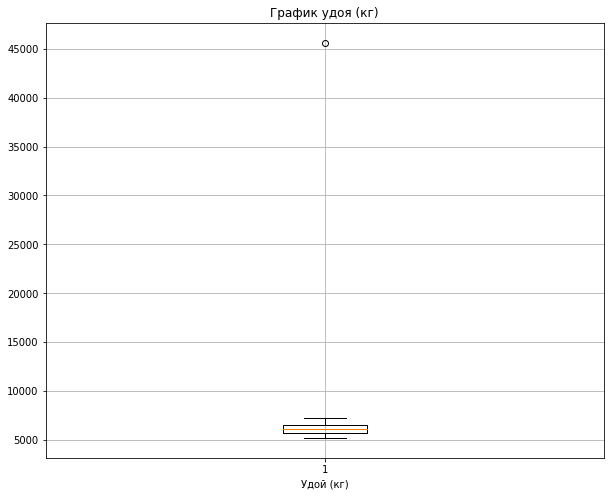

In [20]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_main['milk_yield_kg'], vert=True)
plt.xlabel('Удой (кг)')
plt.title('График удоя (кг)')
plt.grid(True)
plt.show()

На графике видим единичный выброс. Все остальные значения уместились между усами. Т.к. у нас только один выброс, то можно его удалить

In [21]:
#посмотрим на строчку с выбросом
df_main.loc[df_main['milk_yield_kg'] >= 45616]

,id,milk_yield_kg,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture,daddy_bull_breed,fat_percent,protein_percent,taste,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


In [22]:
#удалим эту строчку (№16)
df_main.drop(16, inplace=True)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍


 

Построим гистограммы для столбцов 'milk_yield_kg', 'energy_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'fat_percent', 'protein_percent'

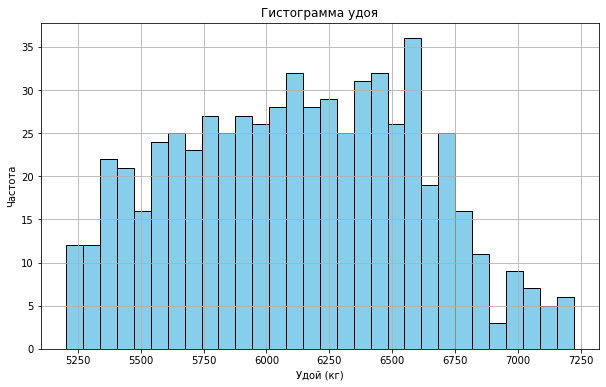

In [23]:
# Построение гистограммы для столбца 'milk_yield_kg'
plt.figure(figsize=(10, 6))
plt.hist(df_main['milk_yield_kg'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Удой (кг)')
plt.ylabel('Частота')
plt.title('Гистограмма удоя')
plt.grid(True)
plt.show()

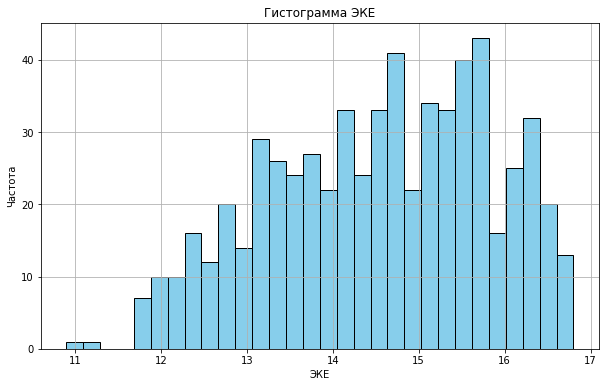

In [24]:
# Построение гистограммы для столбца 'energy_feed_unit'
plt.figure(figsize=(10, 6))
plt.hist(df_main['energy_feed_unit'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('ЭКЕ')
plt.ylabel('Частота')
plt.title('Гистограмма ЭКЕ')
plt.grid(True)
plt.show()

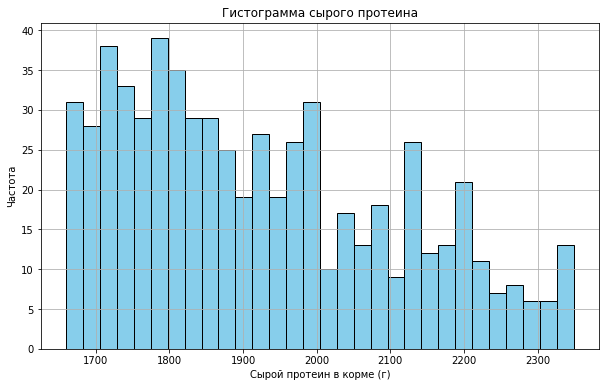

In [25]:
# Построение гистограммы для столбца 'crude_protein'
plt.figure(figsize=(10, 6))
plt.hist(df_main['crude_protein'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Сырой протеин в корме (г)')
plt.ylabel('Частота')
plt.title('Гистограмма сырого протеина')
plt.grid(True)
plt.show()

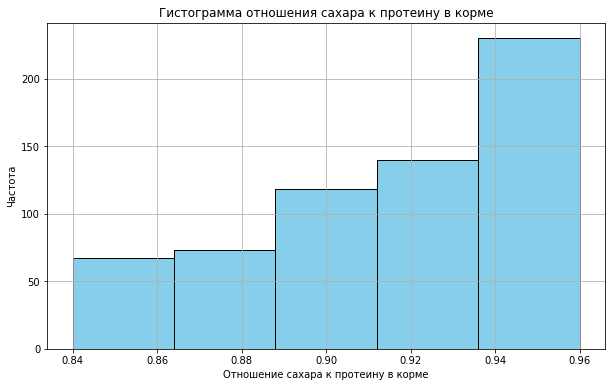

In [26]:
# Построение гистограммы для столбца 'sugar_protein_ratio'
plt.figure(figsize=(10, 6))
plt.hist(df_main['sugar_protein_ratio'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Отношение сахара к протеину в корме')
plt.ylabel('Частота')
plt.title('Гистограмма отношения сахара к протеину в корме')
plt.grid(True)
plt.show()

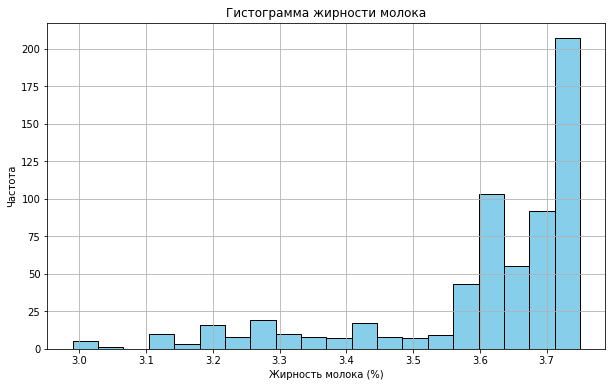

In [27]:
# Построение гистограммы для столбца 'fat_percent'
plt.figure(figsize=(10, 6))
plt.hist(df_main['fat_percent'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Жирность молока (%)')
plt.ylabel('Частота')
plt.title('Гистограмма жирности молока')
plt.grid(True)
plt.show()

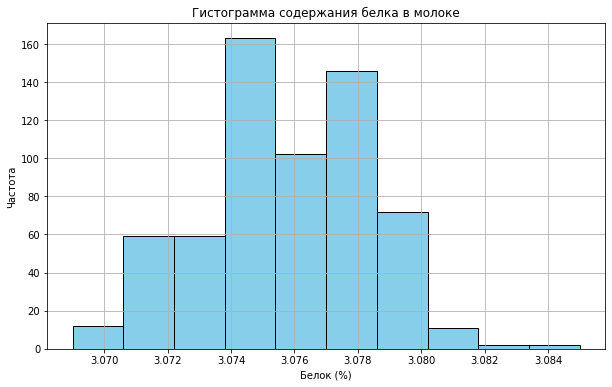

In [28]:
# Построение гистограммы для столбца ''protein_percent''
plt.figure(figsize=(10, 6))
plt.hist(df_main['protein_percent'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Белок (%)')
plt.ylabel('Частота')
plt.title('Гистограмма содержания белка в молоке')
plt.grid(True)
plt.show()

Построим ящики с усами для числовых столбцов, чтобы посмотреть на наличие выбросов.

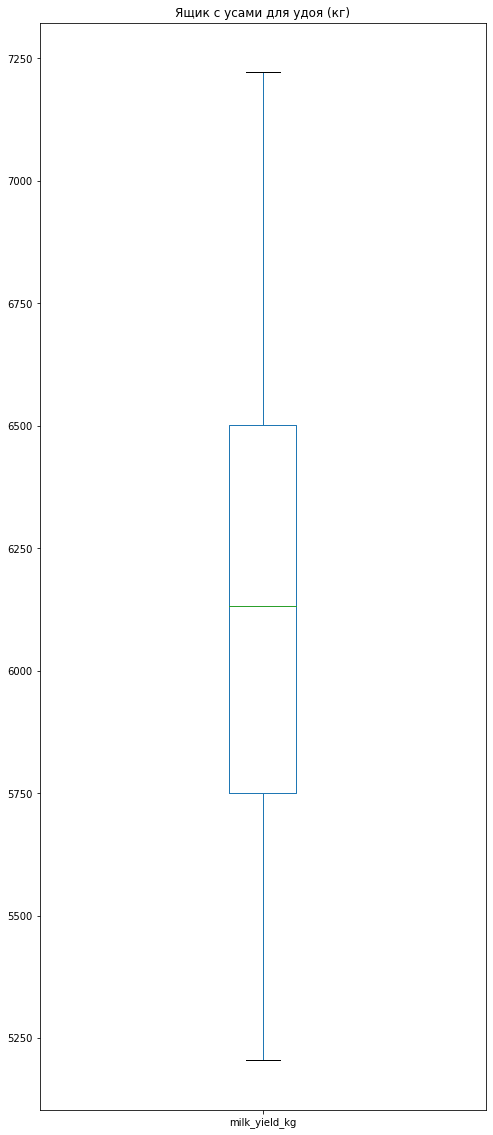

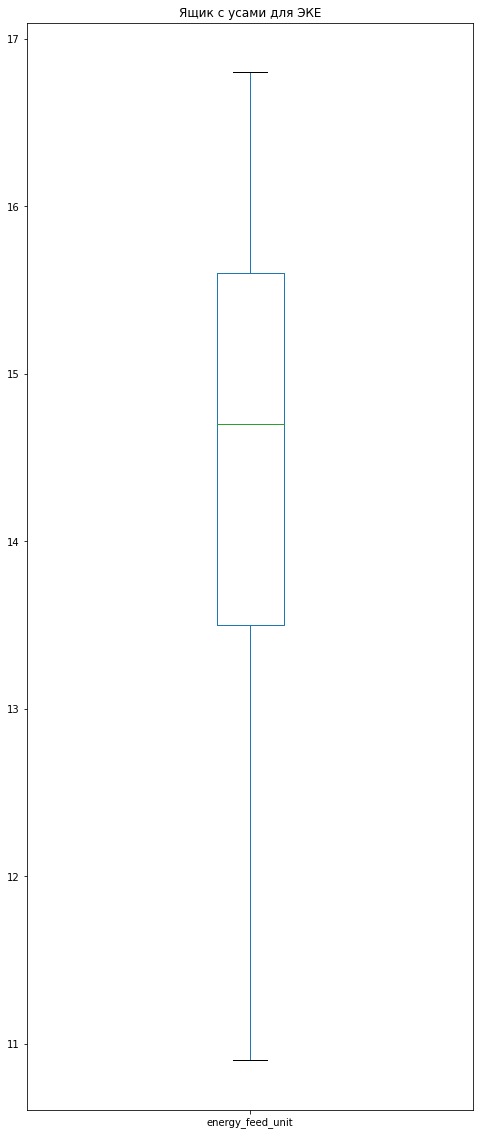

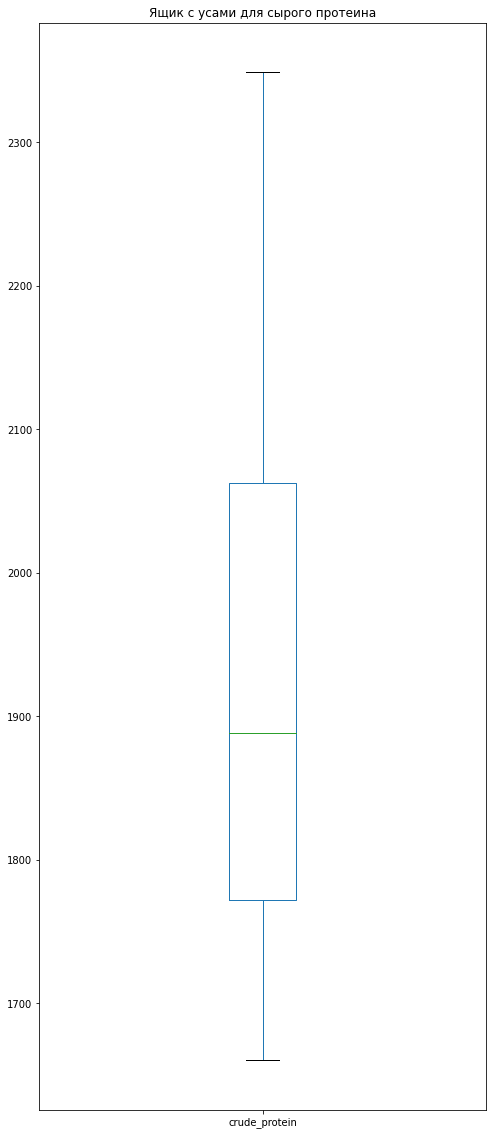

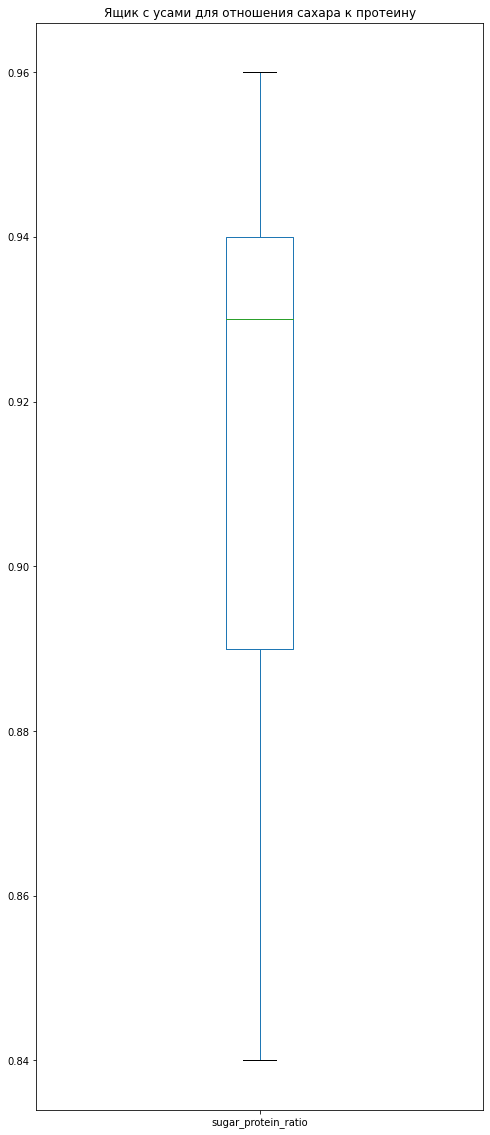

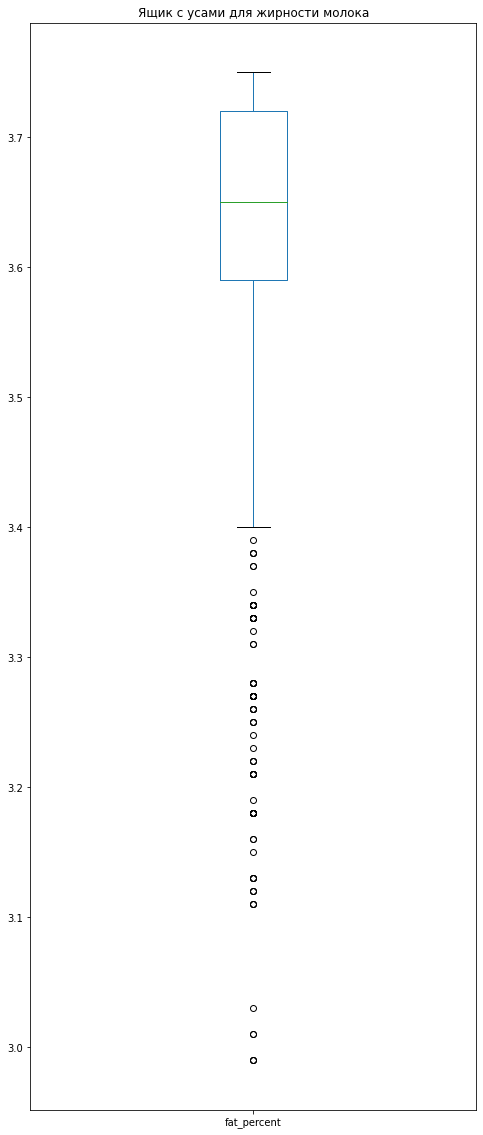

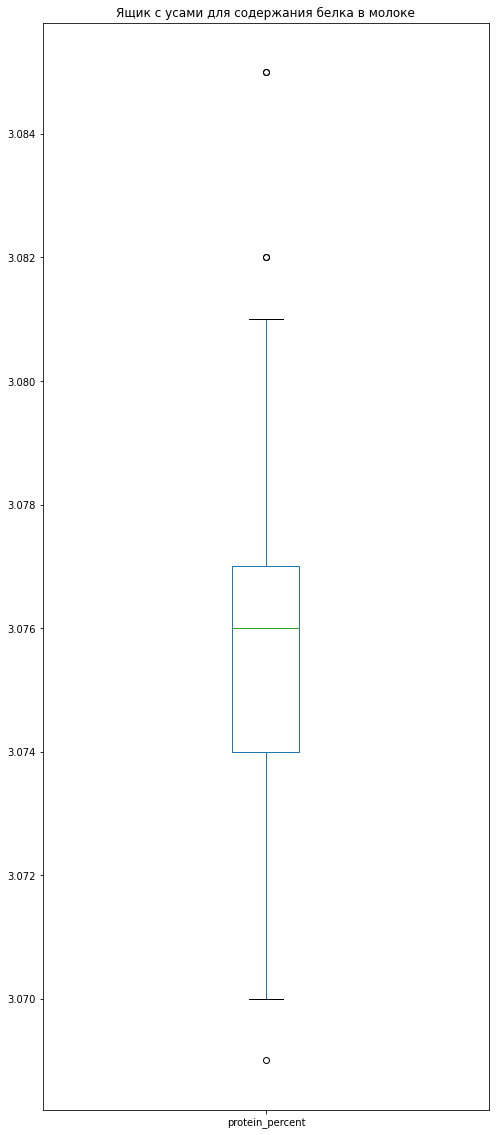

In [29]:
def plot_boxplots(df, columns, titles):
    # Построение ящиков с усами для каждого столбца
    for column, title in zip(columns, titles):
        plt.figure(figsize=(8, 20))
        df[column].plot(kind='box')
        plt.title('Ящик с усами для ' + title)
        plt.show()

# Список столбцов для построения ящиков с усами
columns_to_plot = ['milk_yield_kg', 'energy_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'fat_percent', 'protein_percent']
titles = ['удоя (кг)', 'ЭКЕ', 'сырого протеина', 'отношения сахара к протеину', 'жирности молока', 'содержания белка в молоке']

# Построение ящиков с усами
plot_boxplots(df_main, columns_to_plot, titles)

Для категориальных столбцов построим круговые диаграммы. Используем функцию

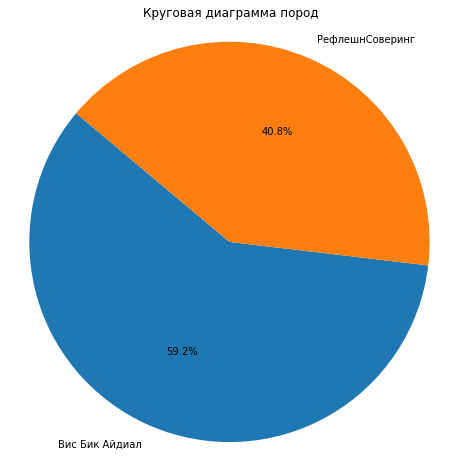

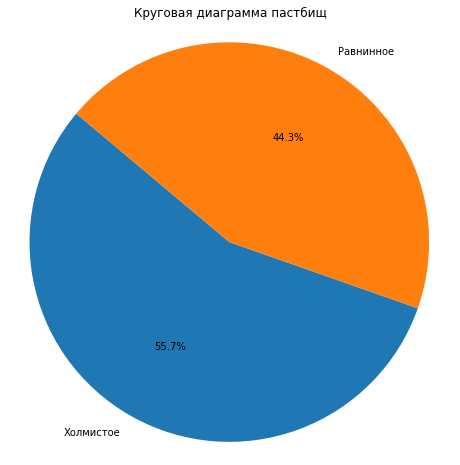

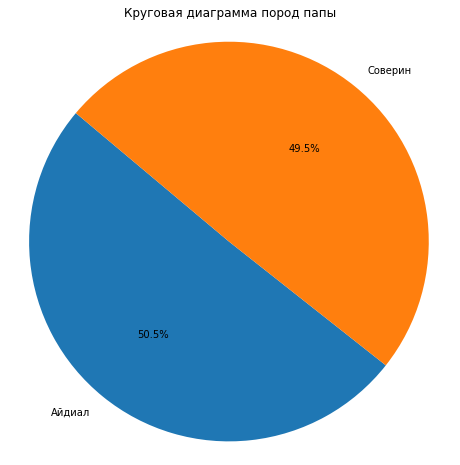

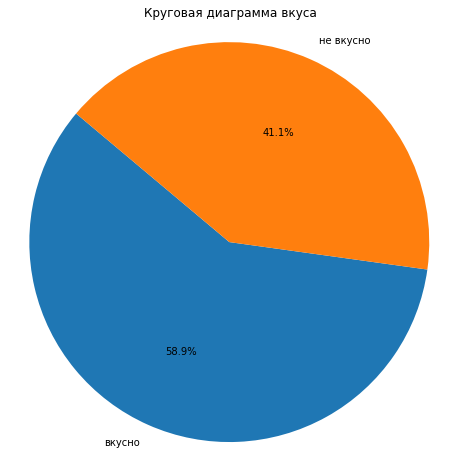

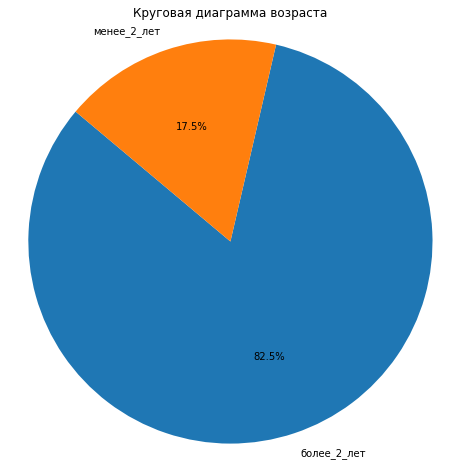

In [30]:
def plot_pie_chart(column_name, title):
    # Получаем значения и их количество для столбца
    values_counts = df_main[column_name].value_counts()
    
    # Построение круговой диаграммы
    plt.figure(figsize=(8, 8))
    plt.pie(values_counts, labels=values_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Круговая диаграмма {title}')
    plt.axis('equal')
    plt.show()

# Построение круговых диаграмм для указанных столбцов
columns_to_plot = [('breed', 'пород'), ('pasture', 'пастбищ'), ('daddy_bull_breed', 'пород папы'),
                   ('taste', 'вкуса'), ('age', 'возраста')]
for column, title in columns_to_plot:
    plot_pie_chart(column, title)

Видим, что имеются выбросы в содержании белка и жира в молоке. Но это не такие аномальные значения, как было ранее удаленное в столбце удоя, поэтому Удалять значения за пределами усов не будем.
Также заметил, что более 80% коров имеют возраст более двух лет. Фермер вкусным считает молоко у 58.9% коров

#### Исследовательский анализ данных в датасете df_buy

Функцией .describe() посмотрим на распределение числовых столбцов

In [31]:
df_buy.describe()

,fat_percent,protein_percent
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


Тут у нас только два числовых столбца - данные о содержании жира и протеина в молоке. Распределение схоже с тем, что у нас было в молоке фермерских коров. Построим гистограммы, ящики с усами и круговые диаграммы

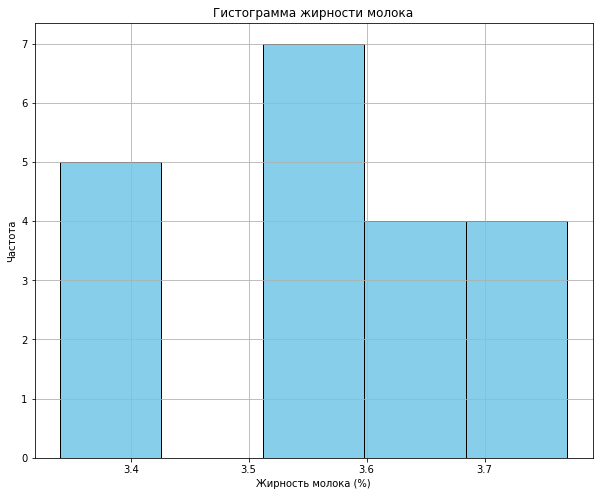

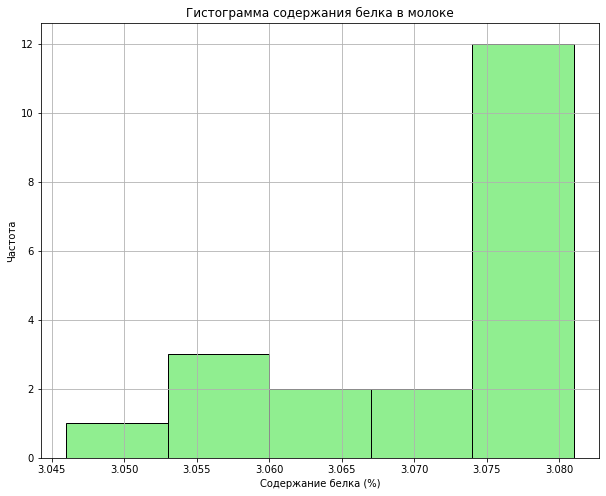

In [32]:
# Создание гистограммы для столбца 'fat_percent'
plt.figure(figsize=(10, 8))
plt.hist(df_buy['fat_percent'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Жирность молока (%)')
plt.ylabel('Частота')
plt.title('Гистограмма жирности молока')
plt.grid(True)
plt.show()

# Создание гистограммы для столбца 'protein_percent'
plt.figure(figsize=(10, 8))
plt.hist(df_buy['protein_percent'], bins=5, color='lightgreen', edgecolor='black')
plt.xlabel('Содержание белка (%)')
plt.ylabel('Частота')
plt.title('Гистограмма содержания белка в молоке')
plt.grid(True)
plt.show()

В большинстве жирность молока - более 3.5%, содержание белка - более 3.07%

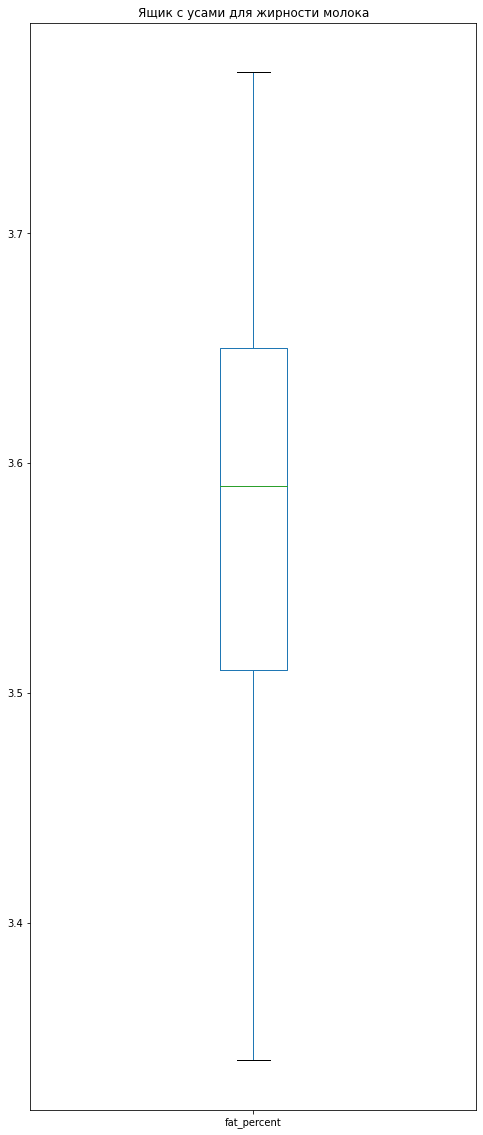

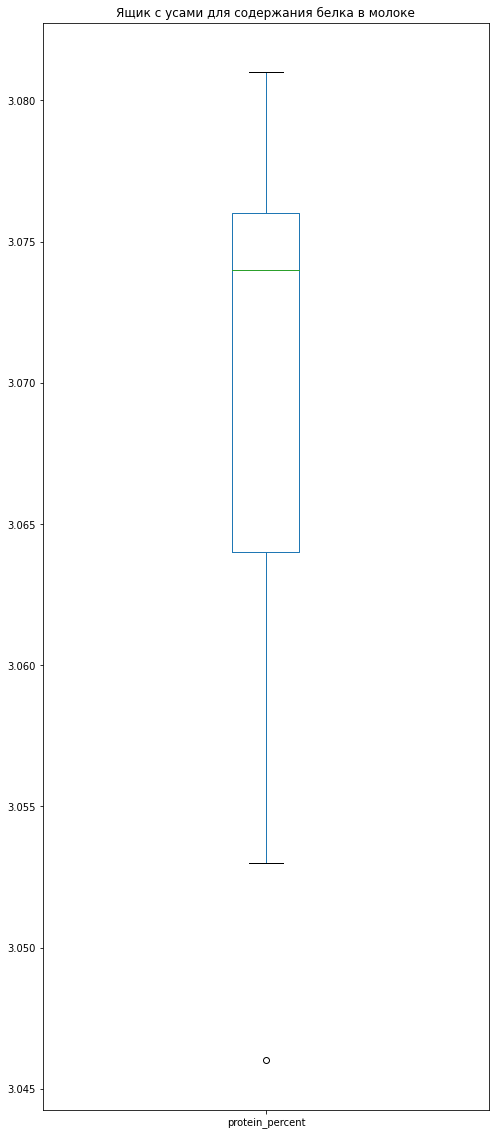

In [33]:
# Список столбцов для построения ящиков с усами
columns_to_plot = ['fat_percent', 'protein_percent']
titles = ['жирности молока', 'содержания белка в молоке']

# Построение ящиков с усами
plot_boxplots(df_buy, columns_to_plot, titles)

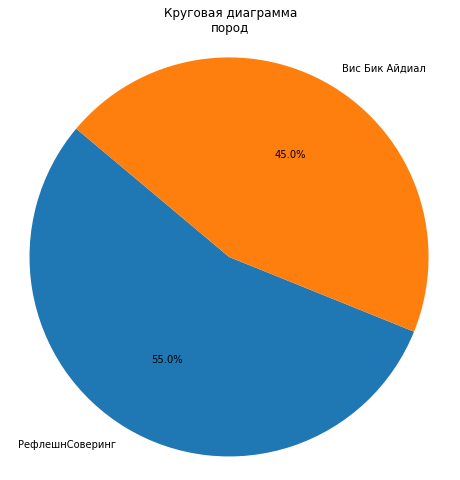

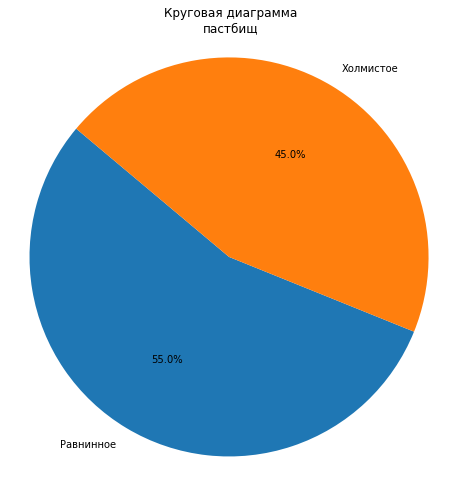

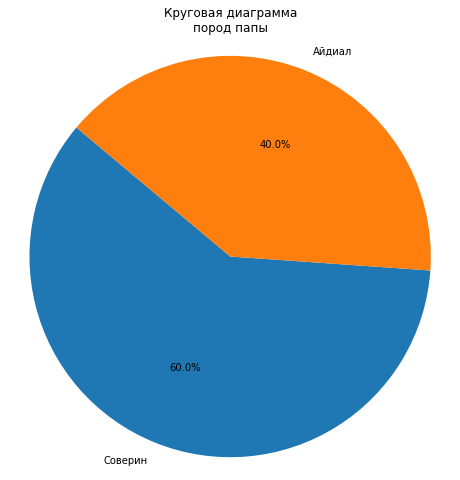

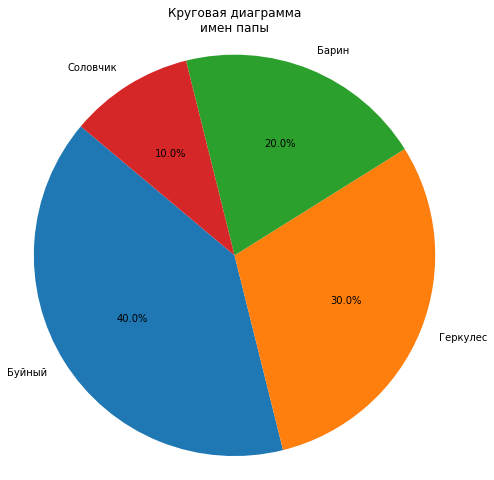

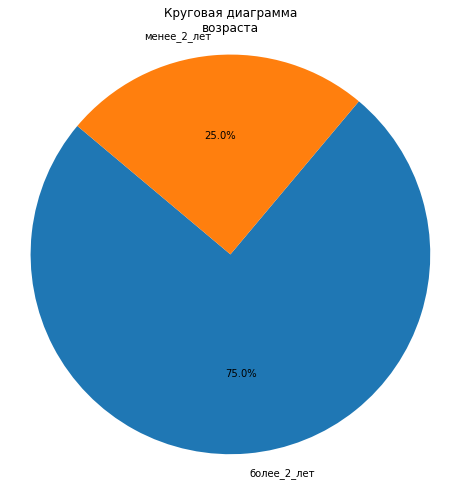

In [34]:
def plot_pie_chart(column_name, title):
    # Получаем значения и их количество для столбца
    values_counts = df_buy[column_name].value_counts()
    
    # Построение круговой диаграммы
    plt.figure(figsize=(8, 8))
    plt.pie(values_counts, labels=values_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Круговая диаграмма\n{title}')
    plt.axis('equal')
    plt.show()

# Построение круговых диаграмм для столбцов
columns_to_plot = [('breed', 'пород'), ('pasture', 'пастбищ'), ('daddy_bull_breed', 'пород папы'),
                   ('daddy_bull_name', 'имен папы'), ('age', 'возраста')]
for column, title in columns_to_plot:
    plot_pie_chart(column, title)

После исследовательского анализа видим, что 75% коров, которые доступны к продаже - в возрасте более двух лет. Породы, пастбища распределены практически поровну. Папы - это в 70% Буйный и Геркулес, а остальные 30% - Барин и Соловчик. Серьезных выбросов и ошибочных значений замечено не было.

### Вывод по шагу 3
###### Датасет с данными о коровах фермера


- В столбце со значениями удоя в год имелся один выброс, который был удален (45616 кг)
- Построили гистограммы с распределением числовых значений
- Большая часть коров дает молоко жирностью более 3,5%
- Построили ящики с усами для поиска выбросов. Значения за пределами усов удалять не стали, т.к. значения вполне нормальные. Вномальных значений более не замечено
- Построили круговые диаграммы для категориальных столбцов

Что можно отметить:

- В стаде фермера около 60% коров дает вкусное молоко (по мнению фермера)
- 82,5% коров в возрасте более 2 лет
- В остальном распределение по категориям близко к 50/50 (от 50/50 до 60/40)
        
        



###### Датасет с коровами, доступными для продажи
- Можем отметить, что 75% коров в возрасте более 2 лет
- 40% коров от быка по имени Буйный, 30% - от Геркулеса, 20% - от Барина, 10% - от Соловчика
- В остальном распределение по категориям близко к 50/50 (от 50/50 до 60/40)

## Шаг 4. Корреляционный анализ

###### Изучение взаимосвязи

Посчитаем коэффициенты корреляции, построим тепловую карту

In [35]:
df_main.corr()

,id,milk_yield_kg,energy_feed_unit,crude_protein,sugar_protein_ratio,fat_percent,protein_percent
id,1.000000,-0.006816,-0.028600,-0.035613,-0.064803,0.017126,0.002547
milk_yield_kg,-0.006816,1.000000,0.765098,0.446731,0.806339,0.600902,0.002966
energy_feed_unit,-0.028600,0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939
crude_protein,-0.035613,0.446731,0.387875,1.000000,0.446332,0.357793,0.226802
sugar_protein_ratio,-0.064803,0.806339,0.749007,0.446332,1.000000,0.629098,0.073718
fat_percent,0.017126,0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542
protein_percent,0.002547,0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000


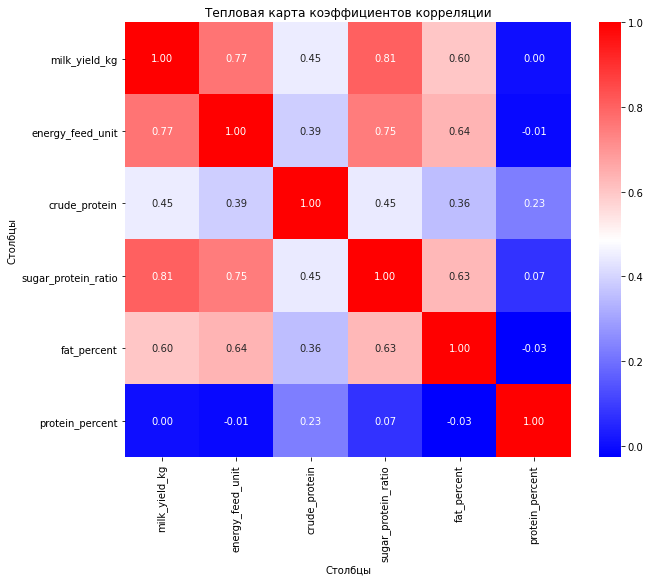

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap((df_main.drop(columns=['id'])).corr(), annot=True, fmt='.2f', cmap='bwr')
plt.title('Тепловая карта коэффициентов корреляции')
plt.xlabel('Столбцы')
plt.ylabel('Столбцы')
plt.show()

Построили тепловую карту с коэффициентами корреляции. Видим, что сильная линейная связь удоя имеется с энергетической кормовой единицей и сахаро-протеиновым соотношением (около 0.8). Чуть меньше (около 0.6) - у жирности молока.

Если посмотреть на гистограммы числовых столбцов, то мы увидим, что распределение, близкое к нормальному - у столбцов 'energy_feed_unit', 'protein_percent'. Для этих столбцов посчитаем коэффициент корреляции Пирсона.

Для столбцов с ненормальным распределением посчитаем коэффициент корреляции Спирмена. Это столбцы 'crude_protein', 'sugar_protein_ratio', 'fat_percent'

In [37]:
display(spearmanr(df_main['milk_yield_kg'], df_main['crude_protein']))
display(spearmanr(df_main['milk_yield_kg'], df_main['fat_percent']))
display(spearmanr(df_main['milk_yield_kg'], df_main['sugar_protein_ratio']))

SpearmanrResult(correlation=0.43754251989802084, pvalue=9.395930002891475e-31)

SpearmanrResult(correlation=0.688505794761783, pvalue=2.1035311214189552e-89)

SpearmanrResult(correlation=0.787904090851949, pvalue=6.236376891916343e-134)

Коэффиценты Спирмена для удоя и столбцов с ненормальным распределением:
 - с сырым протеином - 0.438
 - с жирностью молока - 0.689
 - с сахаро-протеиновым соотношением - 0.788

Видим, что наиболее сильная линейная связь - у сахаро-протеинового соотношения и жирностью

In [38]:
display(pearsonr(df_main['milk_yield_kg'], df_main['energy_feed_unit']))
display(pearsonr(df_main['milk_yield_kg'], df_main['protein_percent']))

PearsonRResult(statistic=0.7650977877344263, pvalue=8.821932133848274e-122)

PearsonRResult(statistic=0.0029657101146912386, pvalue=0.940873064518043)

Коэффиценты Пирсона для удоя и столбцов с нормальным распределением:
 - с энергетической кормовой единицей - 0.765
 - с содержанием протеина в молоке - 0.003

Видим, что сильная линейная связь имеется у значения энергетической кормовой единицей. С содержанием протеина в молоке связь отсутствует

Посмотим на описание данных для тех коров, у которых вкусное молоко и у кторых невкусное

In [39]:
# Создание среза по вкусу
df_tasty = df_main.loc[df_main['taste'] == 'вкусно']
df_not_tasty = df_main.loc[df_main['taste'] == 'не вкусно']

display(df_tasty.describe())
display(df_not_tasty.describe())

,id,milk_yield_kg,energy_feed_unit,crude_protein,sugar_protein_ratio,fat_percent,protein_percent
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,304.621622,6170.770270,14.781622,1946.429730,0.918176,3.617486,3.075943
std,179.687964,475.047964,1.306120,187.163021,0.030038,0.164526,0.002547
min,1.000000,5204.000000,10.900000,1661.000000,0.840000,2.990000,3.070000
25%,152.250000,5785.750000,13.825000,1788.000000,0.890000,3.610000,3.074000
50%,303.500000,6166.000000,15.000000,1925.000000,0.935000,3.710000,3.076000
75%,448.250000,6523.500000,15.775000,2088.000000,0.940000,3.720000,3.078000
max,629.000000,7222.000000,16.800000,2343.000000,0.960000,3.750000,3.085000


,id,milk_yield_kg,energy_feed_unit,crude_protein,sugar_protein_ratio,fat_percent,protein_percent
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,331.038760,6061.717054,14.214729,1891.248062,0.905795,3.585310,3.075279
std,183.236357,470.522718,1.222653,171.629001,0.033864,0.171628,0.002511
min,3.000000,5207.000000,11.100000,1660.000000,0.840000,2.990000,3.069000
25%,170.750000,5642.750000,13.300000,1751.500000,0.880000,3.572500,3.073000
50%,338.500000,6061.500000,14.200000,1845.000000,0.930000,3.630000,3.075000
75%,493.500000,6464.750000,15.200000,1994.000000,0.930000,3.720000,3.077000
max,627.000000,7052.000000,16.700000,2349.000000,0.950000,3.740000,3.081000


По этим таблицам распределений ничего не бросается в глаза. Переходим к визуализации

###### Визуализация корреляции

Дальнейшие построения диаграмм рассеяния выполним с помощью функции

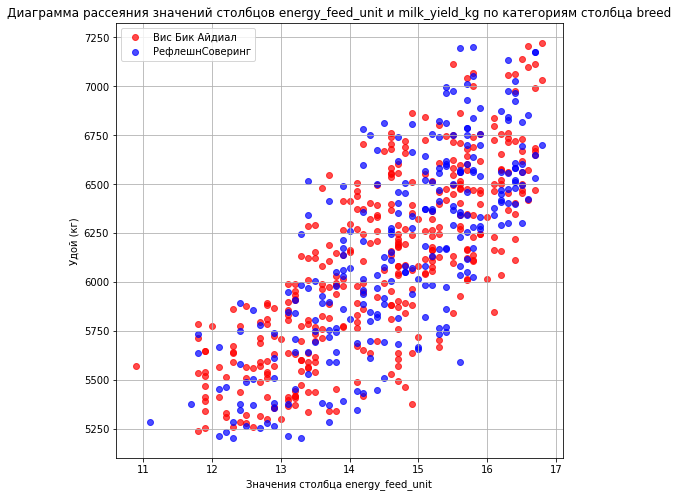

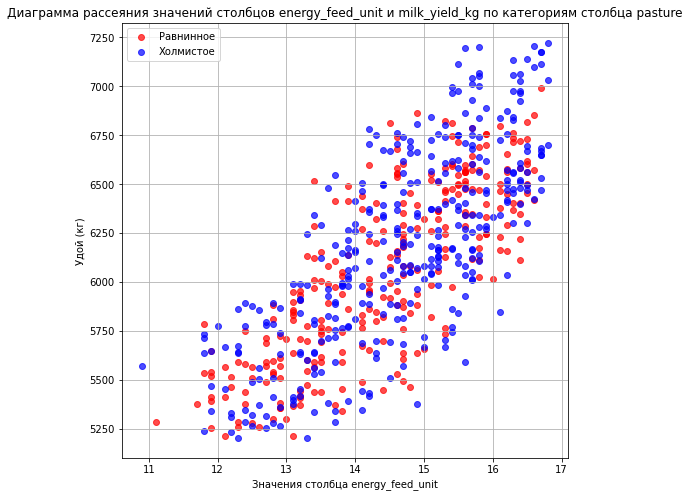

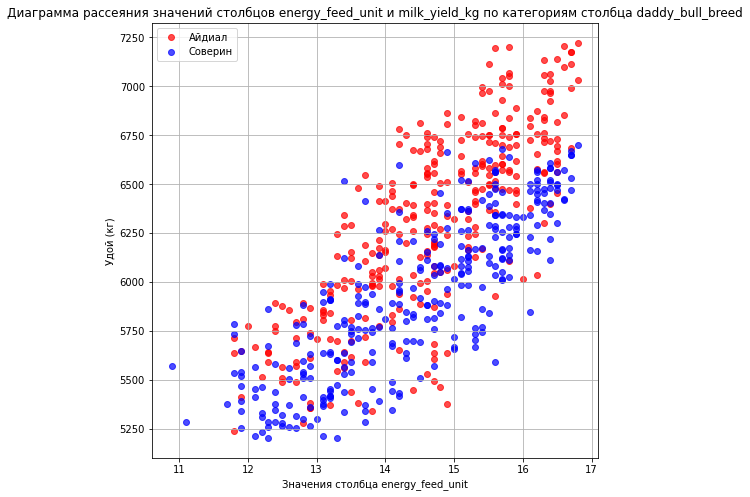

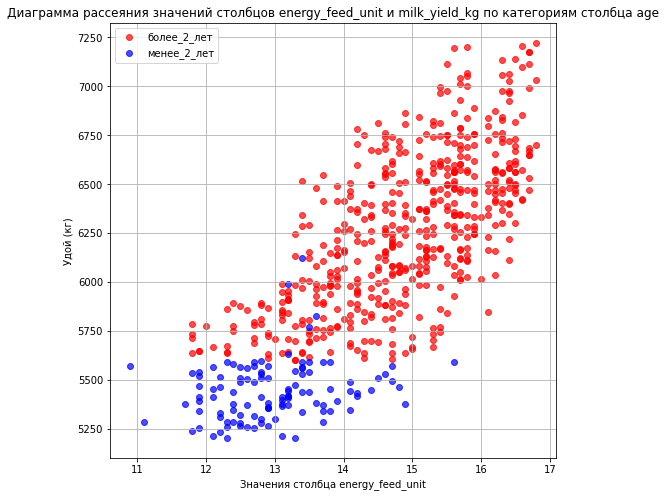

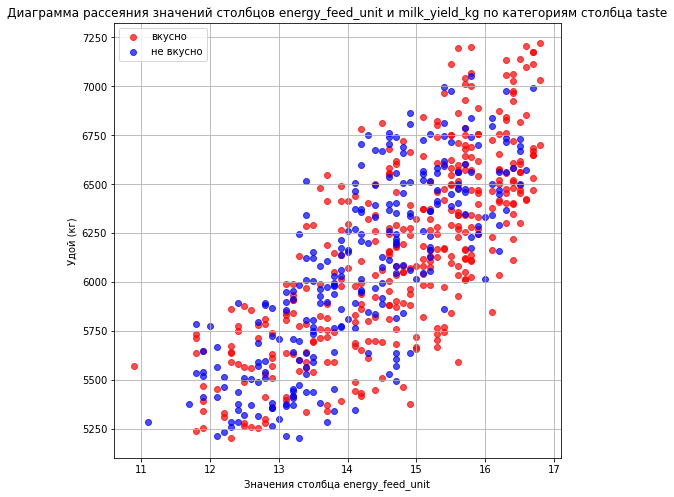

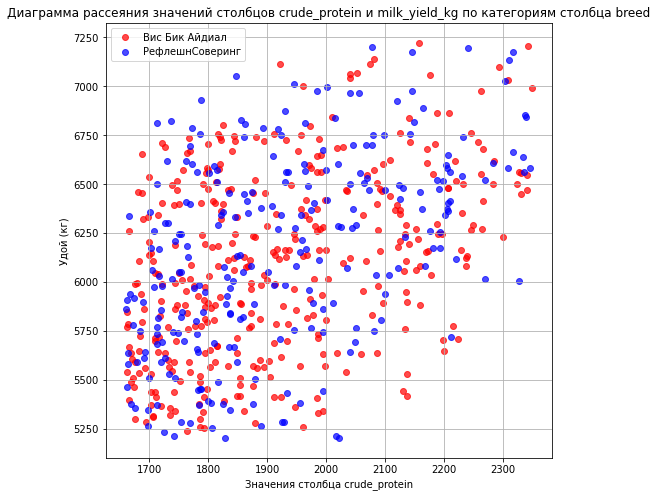

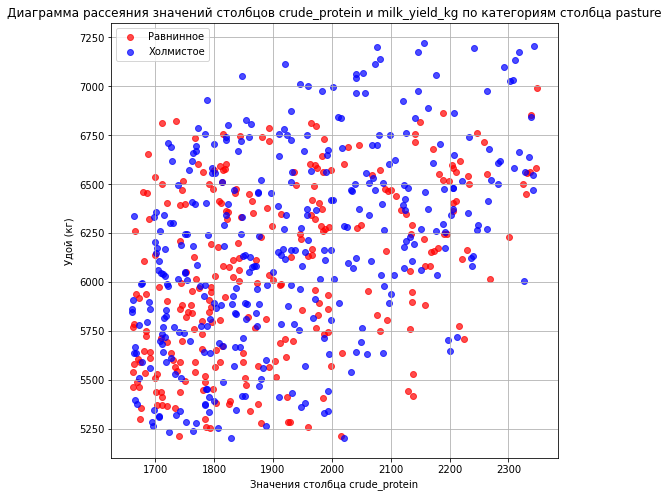

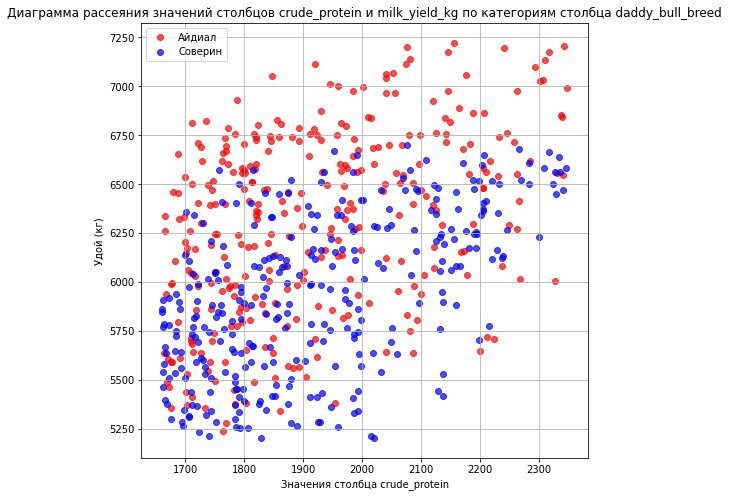

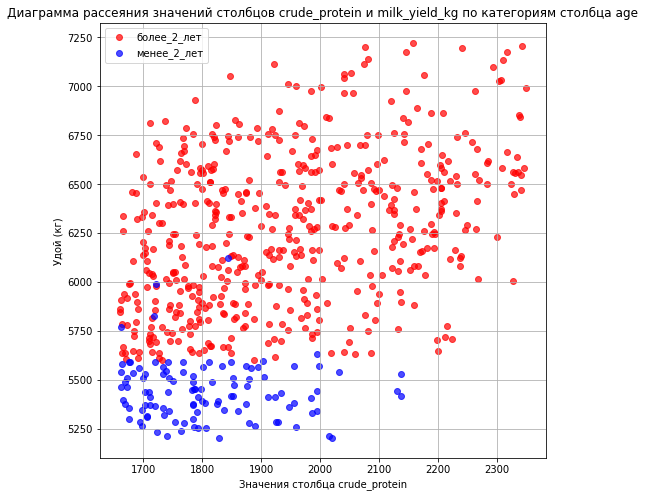

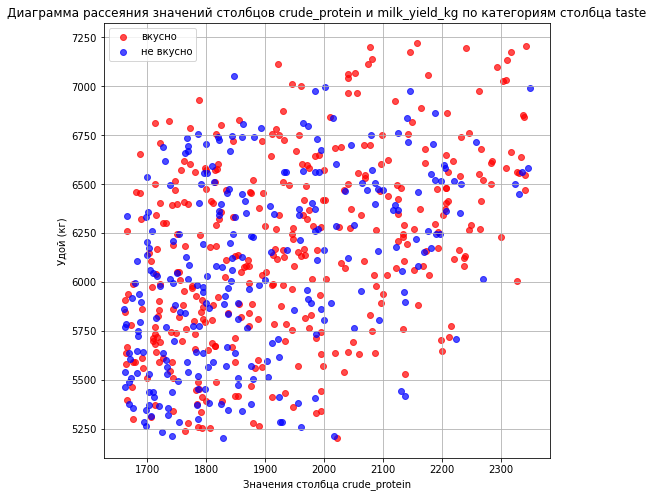

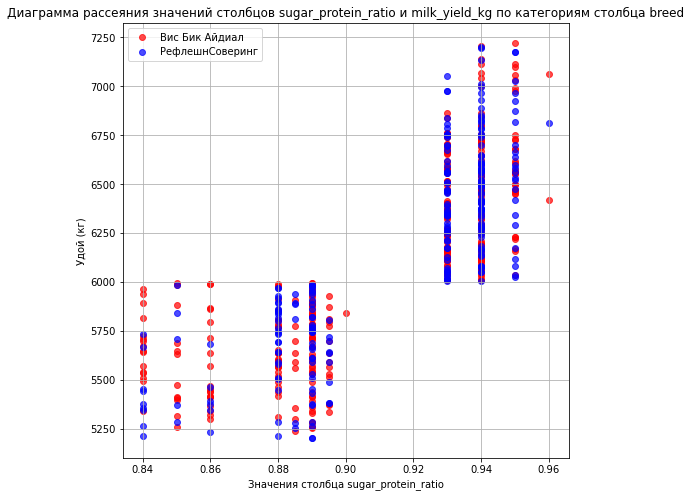

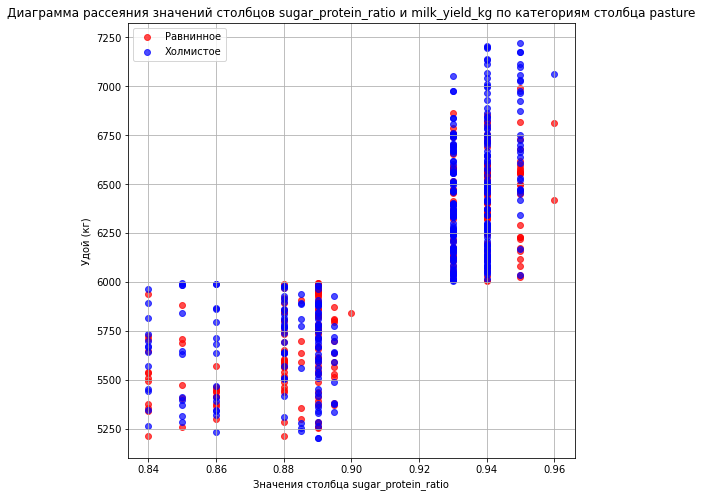

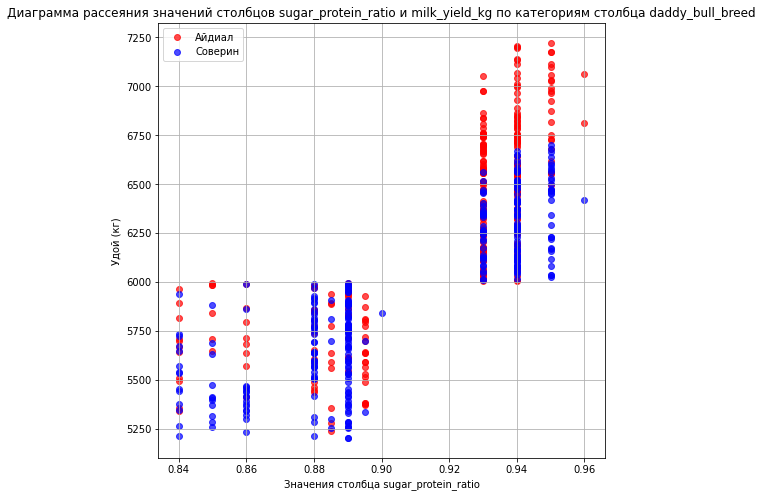

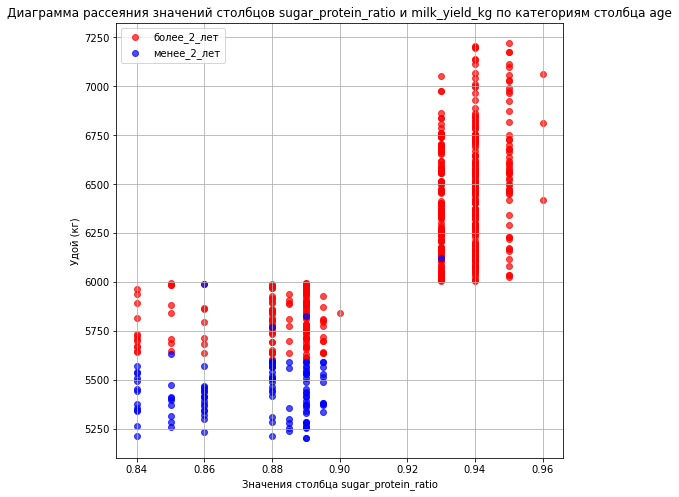

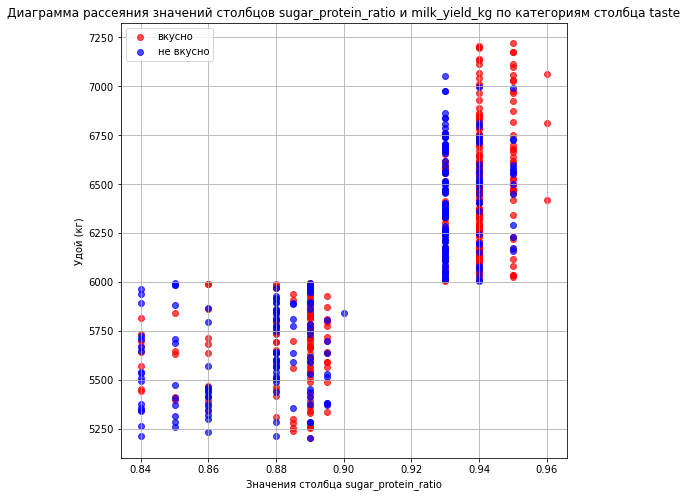

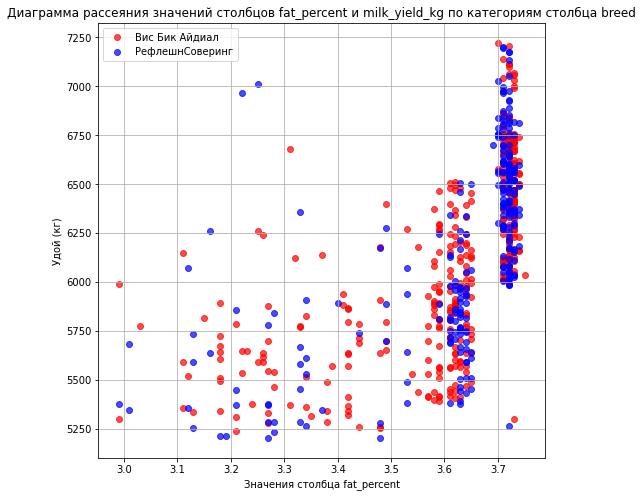

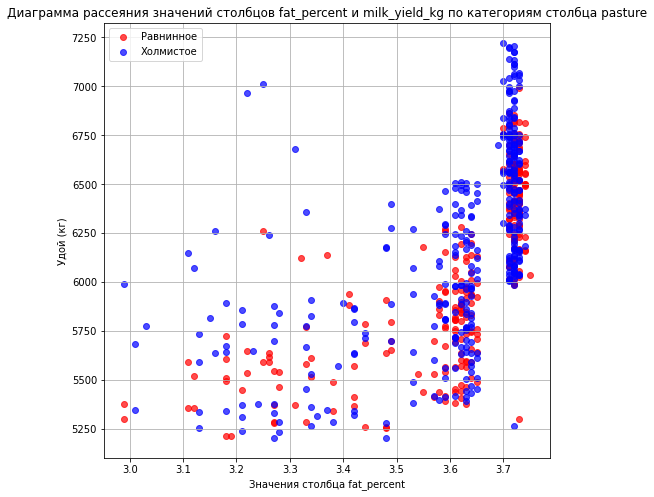

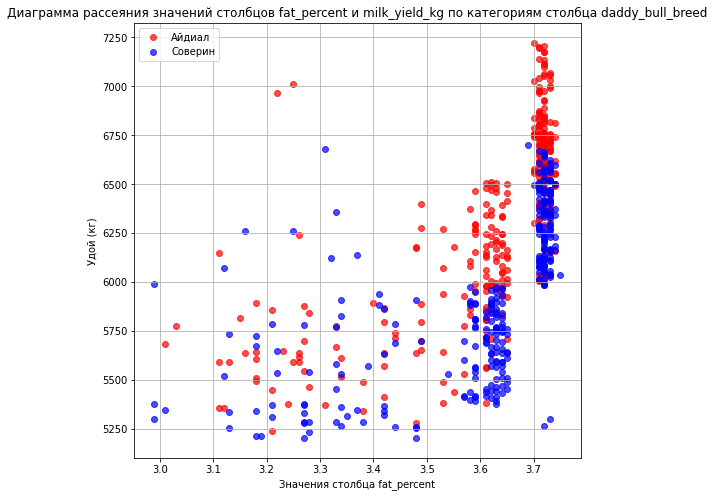

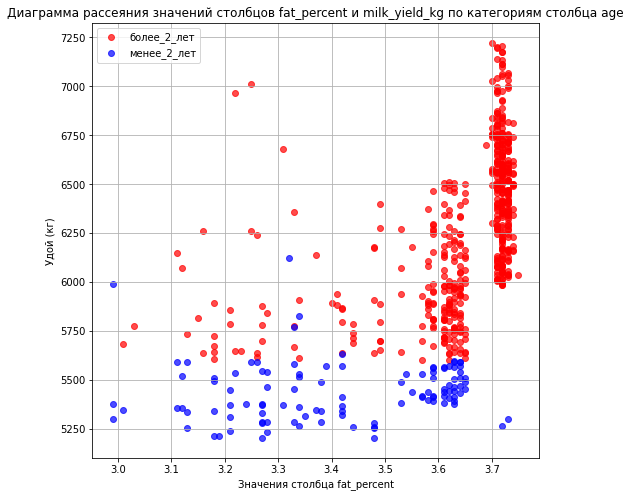

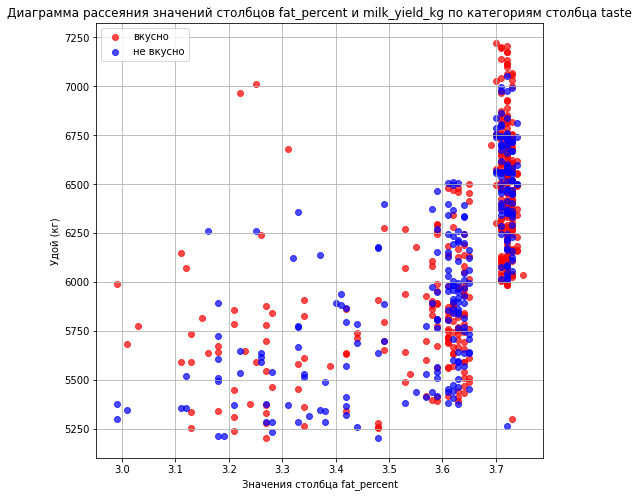

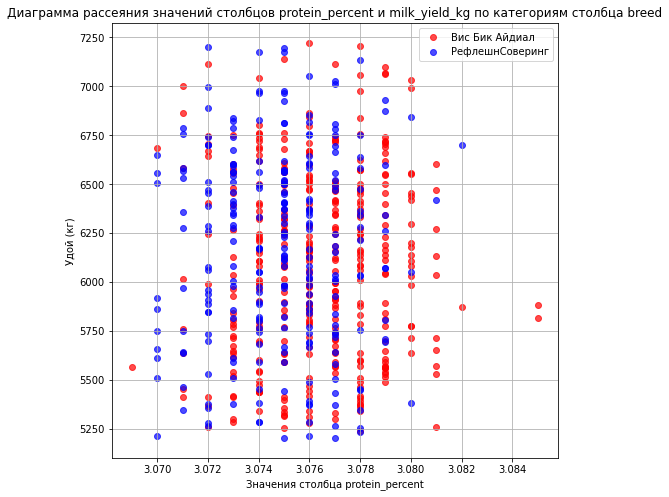

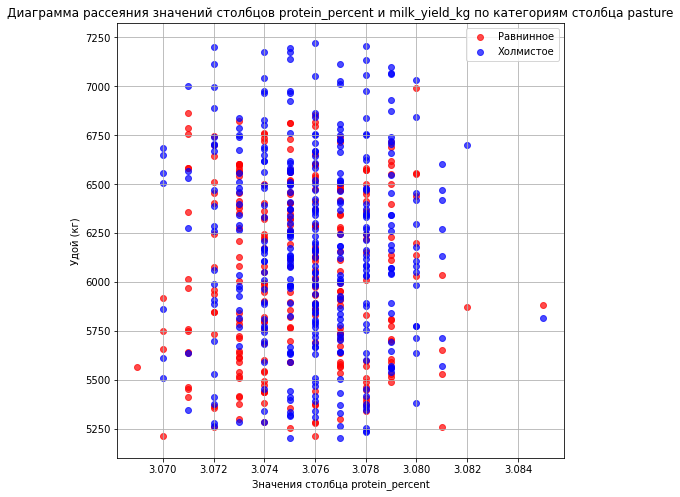

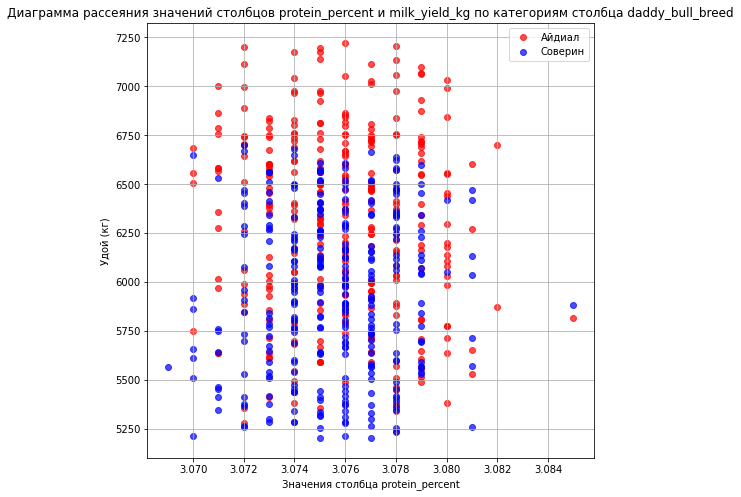

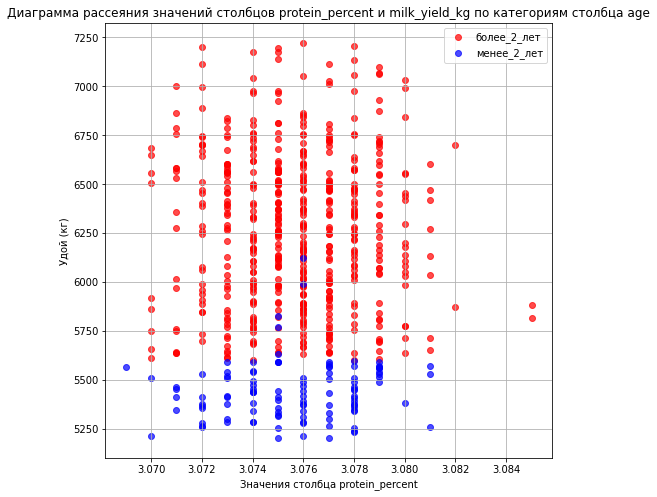

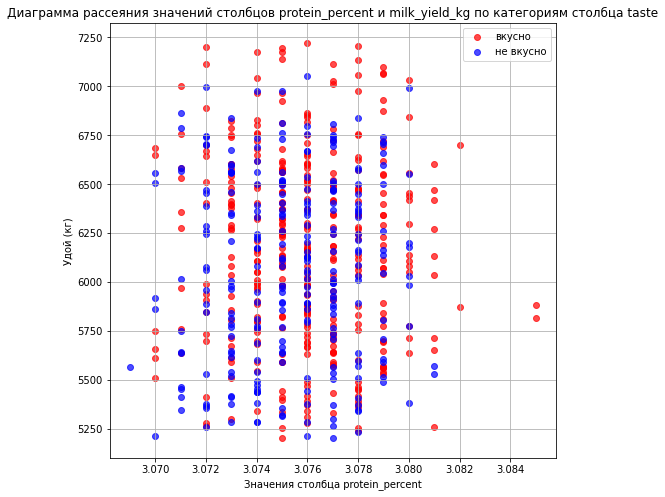

In [40]:
def scatterplot_by_group(df, x_column, y_column, group_column, colors):
    groups = df[group_column].unique()
    
    plt.figure(figsize=(8, 8))
    
    for i, group in enumerate(groups):
        subset = df[df[group_column] == group]
        plt.scatter(subset[x_column], subset[y_column], label=f"{group}",
                    color=colors[i % len(colors)], alpha=0.7, marker='o')
    
    plt.xlabel(f'Значения столбца {x_column}')
    plt.ylabel('Удой (кг)')
    plt.title(f'Диаграмма рассеяния значений столбцов {x_column} и milk_yield_kg по категориям столбца {group_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Список столбцов, значения которых будут на оси X
x_columns = ['energy_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'fat_percent', 'protein_percent']

# Список цветов для каждой категории
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Построение диаграмм рассеяния для каждого столбца на оси X с разбиением по группам
for column in x_columns:
    scatterplot_by_group(df_main, column, 'milk_yield_kg', 'breed', colors)
    scatterplot_by_group(df_main, column, 'milk_yield_kg', 'pasture', colors)
    scatterplot_by_group(df_main, column, 'milk_yield_kg', 'daddy_bull_breed', colors)
    scatterplot_by_group(df_main, column, 'milk_yield_kg', 'age', colors)
    scatterplot_by_group(df_main, column, 'milk_yield_kg', 'taste', colors)

C помощью VIF (variance inflation factor) проверим признаки на мультиколлинеарность

In [41]:
# Удаляем столбцы 'id', 'milk_yield_kg', 'taste', так как они не являются признаками
X = df_main.drop(columns=['id', 'milk_yield_kg', 'taste'])

# Преобразуем категориальные признаки в числовые
X = pd.get_dummies(X, drop_first=True)

# Добавляем константу для регрессии
X = sm.add_constant(X)

# Рассчитываем VIF для каждого признака
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Удаляем строку с константой, так как она не является признаком
vif_data = vif_data[vif_data["Feature"] != "const"]

# Вывод VIF
print(vif_data)

                    Feature       VIF
1          energy_feed_unit  2.716195
2             crude_protein  1.359182
3       sugar_protein_ratio  2.867791
4               fat_percent  1.999274
5           protein_percent  1.204931
6     breed_РефлешнСоверинг  1.144025
7         pasture_Холмистое  1.075540
8  daddy_bull_breed_Соверин  1.137524
9           age_менее_2_лет  1.670923


У нас есть признаки с умеренной, но некритичной коллинеарностью: ЭКЕ, СПО и жирность молока. Все признаки имеют значение VIF менее 5, поэтому это не вызывает серьезных проблем

### Вывод по шагу 4

- В ходе кореляционного анализа построили тепловую карту с матрицей коэффициентов
- Сильная линейная связь удоя имеется с энергетической кормовой единицей и сахаро-протеиновым соотношением (около 0.8). Чуть меньше (около 0.6) - у жирности молока

Коэффиценты Спирмена для удоя и столбцов с ненормальным распределением:
 - с сырым протеином - 0.438
 - с жирностью молока - 0.689
 - с сахаро-протеиновым соотношением - 0.788
 
  Коэффиценты Пирсона для удоя и столбцов с нормальным распределением:
 - с энергетической кормовой единицей - 0.765
 - с содержанием протеина в молоке - 0.003 (корреляция отсутствует)

- Выполнили построения диаграмм рассеяния

Сделали следующие выводы:
- Более 7000 кг дают коровы, которые пасутся на холмистых пастбищах.
- Породы папы быка важны. Более 6700 кг удоя дают коровы, у которых папа – Айдиал. При Этом для коров от папы Айдиал необходимо меньше калойрийности корма
- Максимальный удой у коров возрастом более двух лет
- Видим, что в нижней части в основном расположены синие точки (невкусное молоко), в верхней - красные. Т.е. вкус молока имеет взаимосвязь с количеством корма. Чем он калорийнее - тем вкуснее молоко.
- В подавляющем большинстве удой более 6000 кг дают коровы соотношением сахара и протеина более 0.92
- В большинстве случаев жирность молока более 3.5%. Удой более 6000 кг только у коров, которые дают молоко жирностью близкое к 3.7% или выше
- Имеются нелинейные связи удоя с соотношением сахара/протеина. Чтобы учесть это необходимо добавить дополнительный столбец со значением, если соотношение сахара и протеина более 0.92
- Имеется нелинейная связи между ЭКЕ и удоем, если провести линию, то она будет похожа на ветвь параболы, т.е. связь квадратичная
- Имеется интересная связь жирности молока с удоем, до значения 3.7% она похожа на линейную, а после на квадратичную или даже кубическую
- При проверке на мультиколлинеарность выяснилось, что ЭКЕ, СПО и жирность молока имеют некоторую зависимость от других признаков, но это не вызывает серьезных проблем и эти признаки можно оставить

## Шаг 5. Обучение модели линейной регрессии

###### Модель №1

Т.к. характеристики молока (вкус, содержание протеина, жирность) - это качественные характеристики, а удой - количественная, то в признаки не будем включать эти столбцы в модель

In [42]:
RANDOM_STATE = 42

# Удаляем ненужные столбцы, разделяем признаки и целевую переменную
X_1 = df_main.drop(['id', 'milk_yield_kg', 'fat_percent', 'protein_percent', 'taste'], axis=1)
y_1 = df_main['milk_yield_kg']

# Разделяем данные на обучающий и тестовый наборы
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(
    X_1, 
    y_1, 
    random_state=RANDOM_STATE
) 

# Выбираем числовые признаки
numerical_cols = X_1_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_1_train.select_dtypes(include=['object']).columns

# Масштабируем числовые признаки
scaler = StandardScaler()
X_1_train_scaled = X_1_train.copy()
X_1_test_scaled = X_1_test.copy()

X_1_train_scaled[numerical_cols] = scaler.fit_transform(X_1_train[numerical_cols])
X_1_test_scaled[numerical_cols] = scaler.transform(X_1_test[numerical_cols])

# Преобразуем категориальные признаки методом OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
X_1_train_encoded = encoder.fit_transform(X_1_train_scaled[cat_cols])
X_1_test_encoded = encoder.transform(X_1_test_scaled[cat_cols])

# Создаем DataFrame для закодированных категориальных признаков
encoded_cat_cols = encoder.get_feature_names(cat_cols)
X_1_train_encoded_df = pd.DataFrame(X_1_train_encoded, columns=encoded_cat_cols, index=X_1_train.index)
X_1_test_encoded_df = pd.DataFrame(X_1_test_encoded, columns=encoded_cat_cols, index=X_1_test.index)

# Объединяем числовые и закодированные категориальные признаки
X_1_train_final = pd.concat([X_1_train_scaled[numerical_cols], X_1_train_encoded_df], axis=1)
X_1_test_final = pd.concat([X_1_test_scaled[numerical_cols], X_1_test_encoded_df], axis=1)

# Обучаем модель линейной регрессии на обучающих данных
model_lr_1 = LinearRegression()
model_lr_1.fit(X_1_train_final, y_1_train)

# Получаем предсказания модели на тестовых данных
predictions_1 = model_lr_1.predict(X_1_test_final)

# рассчитайте значения R2 для линейной регрессии
r2_1 = r2_score(y_1_test, predictions_1)
r2_1

0.7844078173416967

Метрика R2 составила 0.784 (78.4%). Посмотрим на остатки модели

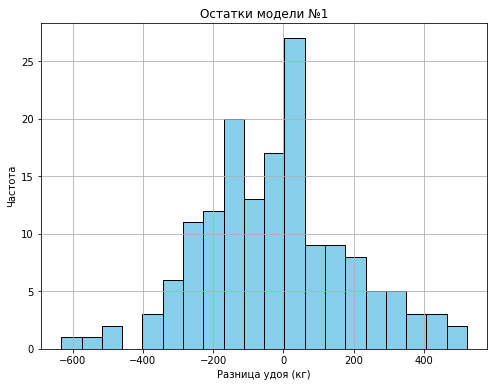

In [43]:
residuals_1 = y_1_test - predictions_1
plt.figure(figsize=(8, 6))
plt.hist(residuals_1, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Разница удоя (кг)')
plt.ylabel('Частота')
plt.title('Остатки модели №1')
plt.grid(True)
plt.show()

Распределение похоже на нормальное, но несимметрично

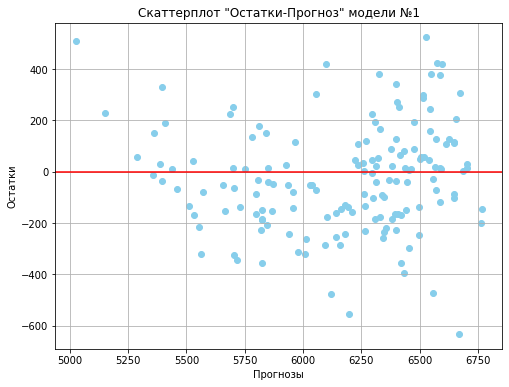

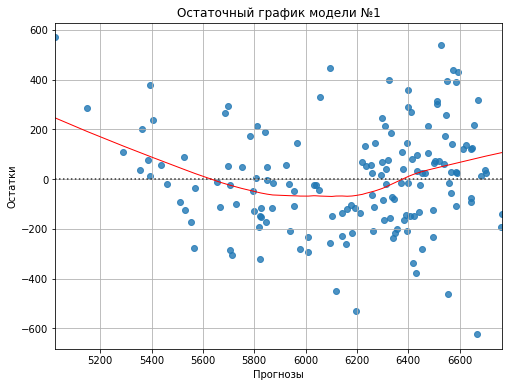

In [44]:
# Строим скаттерплот "остатки-прогноз"
plt.figure(figsize=(8, 6))
plt.scatter(predictions_1, residuals_1, color='skyblue')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Прогнозы')
plt.ylabel('Остатки')
plt.title('Скаттерплот "Остатки-Прогноз" модели №1')
plt.grid(True)
plt.show()

# Строим residplot
plt.figure(figsize=(8, 6))
sns.residplot(x=predictions_1, y=y_1_test, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Прогнозы')
plt.ylabel('Остатки')
plt.title('Остаточный график модели №1')
plt.grid(True)
plt.show()

Мы построили первую модель, в которой удалили из признаков характристики молока и вкус. Получили метрику R2 = 0.784. График остатков близок к нормальному распределению, но не совсем симметричный. По графикам остатков видим, что на большом прогнозе удоя разброс остатков выше

Еще необходимо провести дополнительные исследования и улучшить модель

###### Модель №2

Добавим столбец, который будет равен значению ЭКЕ в квадрате. Также добавим столбец, который будет принимать значение "1", в случае если сахаро-протеиновое соотношение больше или равно 0.92.
Во второй модели удалим из признаков ЭКЕ и сахаро-протеиновое соотношение

In [45]:
# Добавление столбца ['energy_feed_unit_2']
df_main['energy_feed_unit_2'] = df_main['energy_feed_unit'] ** 2

# Добавление столбца
df_main['spr_0.92'] = df_main['sugar_protein_ratio'].apply(lambda i: 0 if i < 0.92 else 1)

In [46]:
# Удаляем ненужные столбцы, разделяем признаки и целевую переменную
X_2 = df_main.drop(['id', 'milk_yield_kg', 'fat_percent', 'protein_percent', 'taste', 'energy_feed_unit',
                    'sugar_protein_ratio'], axis=1)
y_2 = df_main['milk_yield_kg']

# Разделяем данные на обучающий и тестовый наборы
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(
    X_2, 
    y_2, 
    random_state=RANDOM_STATE
) 

# Выбираем числовые признаки
numerical_cols = X_2_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_2_train.select_dtypes(include=['object']).columns

# Масштабируем числовые признаки
scaler = StandardScaler()
X_2_train_scaled = X_2_train.copy()
X_2_test_scaled = X_2_test.copy()

X_2_train_scaled[numerical_cols] = scaler.fit_transform(X_2_train[numerical_cols])
X_2_test_scaled[numerical_cols] = scaler.transform(X_2_test[numerical_cols])

# Преобразуем категориальные признаки методом OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
X_2_train_encoded = encoder.fit_transform(X_2_train_scaled[cat_cols])
X_2_test_encoded = encoder.transform(X_2_test_scaled[cat_cols])

# Создаем DataFrame для закодированных категориальных признаков
encoded_cat_cols = encoder.get_feature_names(cat_cols)
X_2_train_encoded_df = pd.DataFrame(X_2_train_encoded, columns=encoded_cat_cols, index=X_2_train.index)
X_2_test_encoded_df = pd.DataFrame(X_2_test_encoded, columns=encoded_cat_cols, index=X_2_test.index)

# Объединяем числовые и закодированные категориальные признаки
X_2_train_final = pd.concat([X_2_train_scaled[numerical_cols], X_2_train_encoded_df], axis=1)
X_2_test_final = pd.concat([X_2_test_scaled[numerical_cols], X_2_test_encoded_df], axis=1)

# Обучаем модель линейной регрессии на обучающих данных
model_lr_2 = LinearRegression()
model_lr_2.fit(X_2_train_final, y_2_train)

# Получаем предсказания модели на тестовых данных
predictions_2 = model_lr_2.predict(X_2_test_final)

# рассчитайте значения R2 для линейной регрессии
r2_2 = r2_score(y_2_test, predictions_2)
r2_2

0.8180879926867504

Метрика R2 составила 0.818 (81.8%). Посмотрим на остатки модели

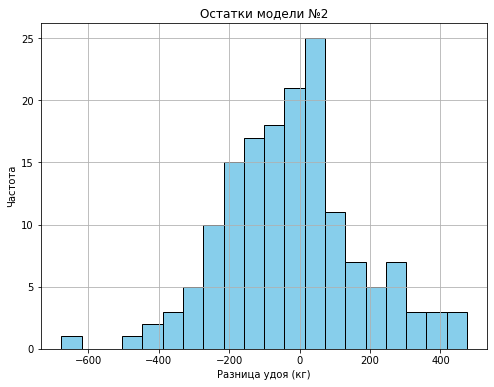

In [47]:
residuals_2 = y_2_test - predictions_2
plt.figure(figsize=(8, 6))
plt.hist(residuals_2, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Разница удоя (кг)')
plt.ylabel('Частота')
plt.title('Остатки модели №2')
plt.grid(True)
plt.show()

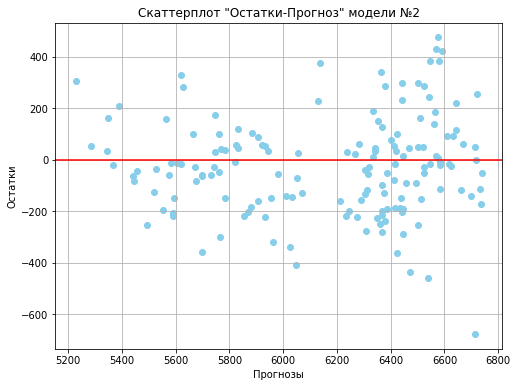

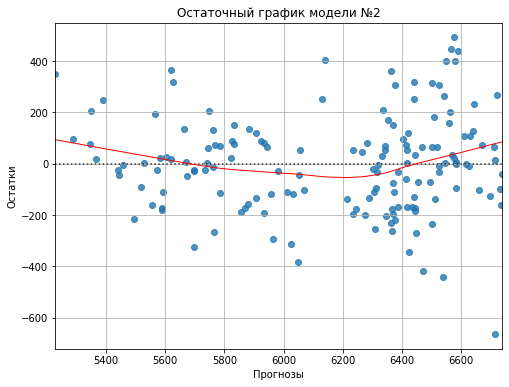

In [48]:
# Строим скаттерплот "остатки-прогноз"
plt.figure(figsize=(8, 6))
plt.scatter(predictions_2, residuals_2, color='skyblue')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Прогнозы')
plt.ylabel('Остатки')
plt.title('Скаттерплот "Остатки-Прогноз" модели №2')
plt.grid(True)
plt.show()

# Строим residplot
plt.figure(figsize=(8, 6))
sns.residplot(x=predictions_2, y=y_2_test, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Прогнозы')
plt.ylabel('Остатки')
plt.title('Остаточный график модели №2')
plt.grid(True)
plt.show()

Мы построили вторую модель, в которую добавили два признака: возвели в квадрат значение ЭКЕ, а также добавили категориальный признак. Он равен единице, если сахаро-протеиновое соотношение 0.92 или более. Получили метрику R2 = 0.818 (81.8%), метрика немного подросла. График остатков все еще несимметричный.стал лучше, близок к нормальному распределению, но его еще можно улучшить

На остаточном графике красная линия стала ближе к горизонтали, т.е. модель улучшилась

###### Модель №3

Объединим датасеты df_main и df_dad по значению 'id'

In [49]:
df_main = df_main.merge(df_dad[['id', 'daddy_bull_name']], on='id', how='left')

In [50]:
df_main.head(10)

,id,milk_yield_kg,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture,daddy_bull_breed,fat_percent,protein_percent,taste,age,energy_feed_unit_2,spr_0.92,daddy_bull_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,0,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,0,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,0,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,0,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,0,Барин
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет,161.29,0,Барин
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.48,3.077,вкусно,более_2_лет,174.24,0,Соловчик
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинное,Айдиал,3.55,3.076,вкусно,более_2_лет,216.09,1,Геркулес
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет,201.64,1,Буйный
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет,179.56,0,Барин


В третьей модели использует не значение породы папы-быка, а имя. Совместно использование будет некорректным, т.к. параметры коллинеарны. Также не будем удалять из признаков характеристики и вкус молока, т.к. при корелляционном анализе прослеживается связь характеристик молока и удоя. Это может быть связано с тем, что на характеристики молока оказывают влияние параметры корма и соответственно на удой

In [51]:
# Удаляем ненужные столбцы, разделяем признаки и целевую переменную
X_3 = df_main.drop(['id', 'milk_yield_kg', 'daddy_bull_breed', 'taste', 'energy_feed_unit', 'sugar_protein_ratio'], axis=1)
y_3 = df_main['milk_yield_kg']

# Разделяем данные на обучающий и тестовый наборы
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(
    X_3, 
    y_3, 
    random_state=RANDOM_STATE
) 

# Выбираем числовые признаки
numerical_cols = X_3_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_3_train.select_dtypes(include=['object']).columns

# Масштабируем числовые признаки
scaler = StandardScaler()
X_3_train_scaled = X_3_train.copy()
X_3_test_scaled = X_3_test.copy()

X_3_train_scaled[numerical_cols] = scaler.fit_transform(X_3_train[numerical_cols])
X_3_test_scaled[numerical_cols] = scaler.transform(X_3_test[numerical_cols])

# Преобразуем категориальные признаки методом OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
X_3_train_encoded = encoder.fit_transform(X_3_train_scaled[cat_cols])
X_3_test_encoded = encoder.transform(X_3_test_scaled[cat_cols])

# Создаем DataFrame для закодированных категориальных признаков
encoded_cat_cols = encoder.get_feature_names(cat_cols)
X_3_train_encoded_df = pd.DataFrame(X_3_train_encoded, columns=encoded_cat_cols, index=X_3_train.index)
X_3_test_encoded_df = pd.DataFrame(X_3_test_encoded, columns=encoded_cat_cols, index=X_3_test.index)

# Объединяем числовые и закодированные категориальные признаки
X_3_train_final = pd.concat([X_3_train_scaled[numerical_cols], X_3_train_encoded_df], axis=1)
X_3_test_final = pd.concat([X_3_test_scaled[numerical_cols], X_3_test_encoded_df], axis=1)

# Обучаем модель линейной регрессии на обучающих данных
model_lr_3 = LinearRegression()
model_lr_3.fit(X_3_train_final, y_3_train)

# Получаем предсказания модели на тестовых данных
predictions_3 = model_lr_3.predict(X_3_test_final)

# рассчитайте значения R3 для линейной регрессии
r2_3 = r2_score(y_3_test, predictions_3)
r2_3

0.8258381115431237

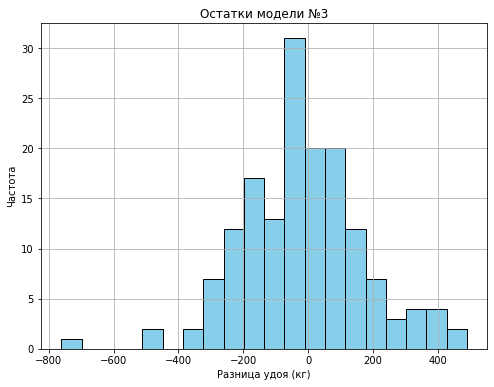

In [52]:
residuals_3 = y_3_test - predictions_3
plt.figure(figsize=(8, 6))
plt.hist(residuals_3, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Разница удоя (кг)')
plt.ylabel('Частота')
plt.title('Остатки модели №3')
plt.grid(True)
plt.show()

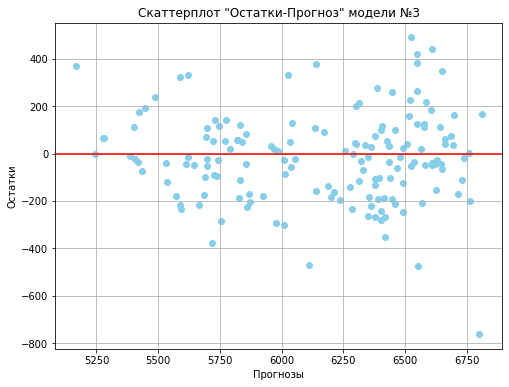

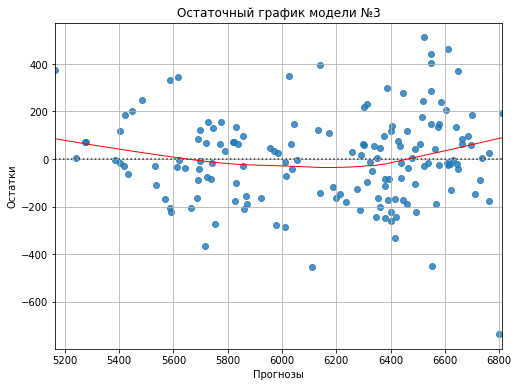

In [53]:
# Строим скаттерплот "остатки-прогноз"
plt.figure(figsize=(8, 6))
plt.scatter(predictions_3, residuals_3, color='skyblue')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Прогнозы')
plt.ylabel('Остатки')
plt.title('Скаттерплот "Остатки-Прогноз" модели №3')
plt.grid(True)
plt.show()

# Строим residplot
plt.figure(figsize=(8, 6))
sns.residplot(x=predictions_3, y=y_3_test, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Прогнозы')
plt.ylabel('Остатки')
plt.title('Остаточный график модели №3')
plt.grid(True)
plt.show()

В третьей модели метрика R2 составила 0.826 (82.6%), а график остатков стал лучше, выбросов и пиков практически нет. На остаточном графике красная линия стала еще ближе к горизонтали, т.е. модель улучшилась

###### Вычисление метрик

Вычислим метрики и сведем в одну таблицу

In [54]:
def calculate_metrics(y_true, y_pred):
    # Вычисляем MSE
    mse = mean_squared_error(y_true, y_pred)

    # Вычисляем MAE
    mae = mean_absolute_error(y_true, y_pred)

    # Вычисляем RMSE
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    return mse, mae, rmse

# Вычисляем метрики для первой модели
mse_1, mae_1, rmse_1 = calculate_metrics(y_1_test, predictions_1)

# Вычисляем метрики для второй модели
mse_2, mae_2, rmse_2 = calculate_metrics(y_2_test, predictions_2)

# Вычисляем метрики для третьей модели
mse_3, mae_3, rmse_3 = calculate_metrics(y_3_test, predictions_3)

In [55]:
# Значения метрик для каждой модели
metrics_data = {
    'Модель': ['№1', '№2', '№3'],
    'MSE': [mse_1, mse_2, mse_3],
    'MAE': [mae_1, mae_2, mae_3],
    'RMSE': [rmse_1, rmse_2, rmse_3],
    'R2': [r2_1, r2_2, r2_3]
}

# Создание DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Вывод таблицы
print(metrics_df)

  Модель           MSE         MAE        RMSE        R2
0     №1  43887.015010  164.241945  209.492279  0.784408
1     №2  37030.911311  149.039652  192.434174  0.818088
2     №3  35453.258641  143.488939  188.290357  0.825838


Исходя из значений метрик, видим что наилучшей моделью является модель №3. В ней максимальный коэффициент детерминации, а метрики ошибок (MSE, MAE, RMSE) наименьшие. Анализ остатков ране показал распределение близкое к нормальному

###### Построим график доверительного интервала для модели №3 (95%)

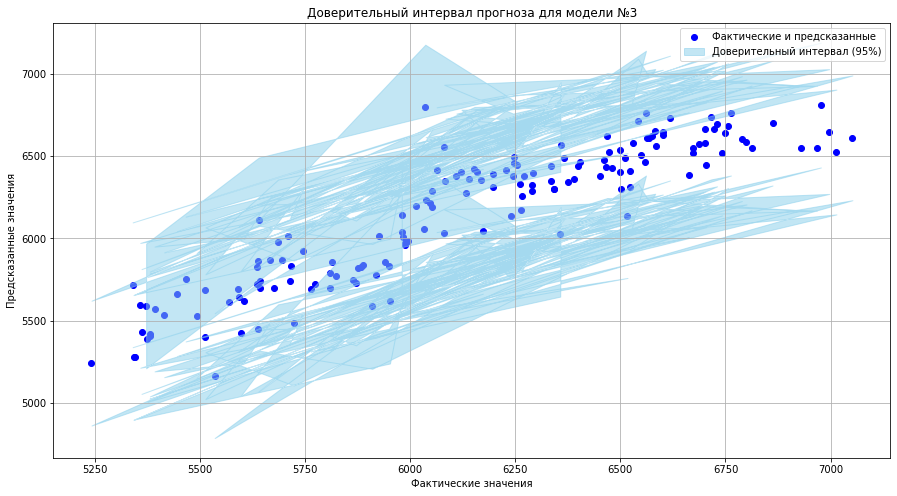

In [56]:
lower_quantile = residuals_3.quantile(0.025)
upper_quantile = residuals_3.quantile(0.975)
    
    # Вычисление доверительного интервала прогноза
lower_bound = predictions_3 - upper_quantile
upper_bound = predictions_3 + upper_quantile


plt.figure(figsize=(15, 8))
plt.scatter(y_3_test, predictions_3, color='blue', label='Фактические и предсказанные')
plt.fill_between(y_3_test, lower_bound, upper_bound, color='skyblue',
                 alpha=0.5, label='Доверительный интервал (95%)')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Доверительный интервал прогноза для модели №3')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# Рассчитываем стандартное отклонение ошибок
std_residuals = np.std(residuals_3, ddof=1)  # ddof=1 для получения несмещенной оценки

# Определяем уровень доверия
alpha = 0.05
# Рассчитываем критическое значение t для 95%-ного доверительного интервала
t_critical = stats.t.ppf(1 - alpha / 2, df=len(X_3_train_final) - 1)

# Среднее значение прогнозов
mean_predictions = np.mean(predictions_3)
# Расчет предельной ошибки
margin_of_error = t_critical * std_residuals
# Доверительный интервал
confidence_interval = (mean_predictions - margin_of_error, mean_predictions + margin_of_error)

# Вывод результатов
print(f"95%-ный доверительный интервал: {confidence_interval}")

95%-ный доверительный интервал: (5789.5860006384755, 6528.730182253648)


###### Прознозирование удоя

Добавим средние значения корма в датасет df_buy, увеличенное на 5%

In [58]:
# Средние значения столбцов в df_main
mean_crude_protein = df_main['crude_protein'].mean()
mean_sugar_protein_ratio = df_main['sugar_protein_ratio'].mean()
mean_energy_feed_unit = df_main['energy_feed_unit'].mean()

# Добавление 5% к средним значениям
mean_crude_protein += mean_crude_protein * 0.05
mean_sugar_protein_ratio += mean_sugar_protein_ratio * 0.05
mean_energy_feed_unit += mean_energy_feed_unit * 0.05

# Добавление столбцов в df_buy
df_buy['crude_protein'] = mean_crude_protein
df_buy['sugar_protein_ratio'] = mean_sugar_protein_ratio
df_buy['energy_feed_unit'] = mean_energy_feed_unit

In [59]:
# Добавление столбца ['energy_feed_unit_2']
df_buy['energy_feed_unit_2'] = df_buy['energy_feed_unit'] ** 2

# Добавление столбца ['spr_0.92']
df_buy['spr_0.92'] = df_buy['sugar_protein_ratio'].apply(lambda i: 0 if i < 0.92 else 1)
df_buy

,breed,pasture,daddy_bull_breed,daddy_bull_name,fat_percent,protein_percent,age,crude_protein,sugar_protein_ratio,energy_feed_unit,energy_feed_unit_2,spr_0.92
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1


In [60]:
X_buy = df_buy.drop(['daddy_bull_breed', 'energy_feed_unit', 'sugar_protein_ratio'], axis=1)

# Получение списка столбцов в том же порядке
columns_order = X_3_train_scaled.columns.tolist()
# Переупорядочивание столбцов в X_buy
X_buy = X_buy.reindex(columns=columns_order)

# Масштабируем числовые признаки
X_buy_scaled = X_buy.copy()
X_buy_scaled[numerical_cols] = scaler.transform(X_buy[numerical_cols])

# Преобразуем категориальные признаки методом OneHotEncoder

X_buy_encoded = encoder.transform(X_buy_scaled[cat_cols])

# Создаем DataFrame для закодированных категориальных признаков
X_buy_encoded_df = pd.DataFrame(X_buy_encoded, columns=encoded_cat_cols, index=X_buy_scaled.index)

# Объединяем числовые и закодированные категориальные признаки
X_buy_final = pd.concat([X_buy_scaled[numerical_cols], X_buy_encoded_df], axis=1)

# Прогнозирование удоя
df_buy['milk_yield_kg'] = model_lr_3.predict(X_buy_final)

Удой спрогнозирован, посмотрим на результаты с сортировкой по убыванию прогнозируемого удоя

In [61]:
df_buy.sort_values(by='milk_yield_kg',ascending=False)

,breed,pasture,daddy_bull_breed,daddy_bull_name,fat_percent,protein_percent,age,crude_protein,sugar_protein_ratio,energy_feed_unit,energy_feed_unit_2,spr_0.92,milk_yield_kg
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6926.116133
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6690.414116
15,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6649.196898
17,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6628.574231
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6600.472506
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6596.914336
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6596.914336
11,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6592.362985
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6568.062839
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6541.741649


Мы видим, что прогнозируемый удой: 6105-6926 кг. При этом 19 bp 20 коров прогнозируется с удоем более 6000 кг. С предложенными средними параметрами корма, увеличенными на 5% эти коровы могут рекомендоваться к покупке по прогнозируемому удою. Но пока у нас нет прогноза по вкусу даваемого молока и мы не можем дать однозначные рекомендации к покупке данных коров

## Шаг 6. Обучение модели логистической регрессии

###### Модель №1

Создадим модель логистической регрессии. Из данных удалим признаки, созданные в ходе улучшения модели линейной регрессии, а также коллинеарные признаки

In [62]:
X_4 = df_main.drop(['id', 'taste', 'daddy_bull_breed', 'spr_0.92', 'energy_feed_unit_2',
                    'milk_yield_kg'], axis=1)
y_4 = df_main['taste']
y_4 = y_4.apply(lambda i: 0 if i == "не вкусно" else 1)

# Разделение данных на обучающий и тестовый наборы
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(
    X_4, 
    y_4, 
    random_state=42,
    stratify=y_4
) 

# Выбираем числовые признаки
numerical_cols = X_4_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_4_train.select_dtypes(include=['object']).columns

# Масштабируем числовые признаки
scaler_clf1 = StandardScaler()
X_4_train_scaled = X_4_train.copy()
X_4_test_scaled = X_4_test.copy()

X_4_train_scaled[numerical_cols] = scaler_clf1.fit_transform(X_4_train[numerical_cols])
X_4_test_scaled[numerical_cols] = scaler_clf1.transform(X_4_test[numerical_cols])

# Преобразуем категориальные признаки методом OneHotEncoder
encoder_clf1 = OneHotEncoder(sparse=False, drop='first')
X_4_train_encoded = encoder_clf1.fit_transform(X_4_train_scaled[cat_cols])
X_4_test_encoded = encoder_clf1.transform(X_4_test_scaled[cat_cols])

# Создаем DataFrame для закодированных категориальных признаков
encoded_cat_cols = encoder_clf1.get_feature_names(cat_cols)
X_4_train_encoded_df = pd.DataFrame(X_4_train_encoded, columns=encoded_cat_cols, index=X_4_train.index)
X_4_test_encoded_df = pd.DataFrame(X_4_test_encoded, columns=encoded_cat_cols, index=X_4_test.index)

# Объединяем числовые и закодированные категориальные признаки
X_4_train_final = pd.concat([X_4_train_scaled[numerical_cols], X_4_train_encoded_df], axis=1)
X_4_test_final = pd.concat([X_4_test_scaled[numerical_cols], X_4_test_encoded_df], axis=1)

# Создание объекта модели
clf1 = LogisticRegression()

# Обучение модели на обработанных и закодированных данных
clf1.fit(X_4_train_final, y_4_train)

# Получение прогнозов
y_pred_4 = clf1.predict(X_4_test_final)

In [63]:
print(f'Accuracy модели составляет {accuracy_score(y_4_test, y_pred_4)}')
print(f'Recall модели составляет {recall_score(y_4_test, y_pred_4)}')
print(f'Precision модели составляет {precision_score(y_4_test, y_pred_4)}')

Accuracy модели составляет 0.5859872611464968
Recall модели составляет 0.75
Precision модели составляет 0.6216216216216216


Мы получили следующие метрики:
- Accuracy = 0.586 (58.6%)
- Recall = 0.75 (75%)
- Precision = 0.622 (62.2%)

Для нашей задачи (прогнозирования вкуса молока) самой важной метрикой является Precision.
Precision вычисляется как TP / (TP + FP). В данном случае TP - это вкусное молоко, а FP - это невкусное молоко, которое было предсказано вкусным. Для фермера эта ошибка будет критична.
Recall: TP вычисляется как TP / (TP + FN). Здесь же FN - невкусное молоко по предсказанию, которое фактически оказалось вкусным. Но фермер изначально расчитывает получать вкусное молоко, поэтому метрика Recall не будет определяющей.

Посмотрим как изменяются метрики в зависимости от порога классификации. Сделаем вычисления с шагом 0.05 от 0.2 до 1

In [64]:
# Значения порога от 0.2 с шагом 0.05
thresholds = np.arange(0.2, 1, 0.01)

# Список для хранения значений precision
precision_scores = []
accuracy_scores = []
recall_scores = []

# Вычисление precision для каждого значения порога
for threshold in thresholds:
    # Получение вероятностей принадлежности к классу "вкусно"
    y_probs = clf1.predict_proba(X_4_test_final)[:, 1]
    # Преобразование вероятностей в метки классов на основе порога
    y_pred_threshold = (y_probs > threshold).astype(int)
    # Вычисление
    precision = precision_score(y_4_test, y_pred_threshold, zero_division=0)
    accuracy = accuracy_score(y_4_test, y_pred_threshold)
    recall = recall_score(y_4_test, y_pred_threshold)
    # Добавление в список
    precision_scores.append(precision)
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
        
# Вывод значений для каждого порога
for threshold, precision, accuracy, recall in zip(thresholds, precision_scores, accuracy_scores, recall_scores):
    print(f"Порог: {threshold:.2f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}, Recall: {recall:.4f}")

Порог: 0.20, Precision: 0.5897, Accuracy: 0.5924, Recall: 1.0000
Порог: 0.21, Precision: 0.5935, Accuracy: 0.5987, Recall: 1.0000
Порог: 0.22, Precision: 0.5909, Accuracy: 0.5924, Recall: 0.9891
Порог: 0.23, Precision: 0.5909, Accuracy: 0.5924, Recall: 0.9891
Порог: 0.24, Precision: 0.5909, Accuracy: 0.5924, Recall: 0.9891
Порог: 0.25, Precision: 0.5855, Accuracy: 0.5796, Recall: 0.9674
Порог: 0.26, Precision: 0.5855, Accuracy: 0.5796, Recall: 0.9674
Порог: 0.27, Precision: 0.5894, Accuracy: 0.5860, Recall: 0.9674
Порог: 0.28, Precision: 0.5933, Accuracy: 0.5924, Recall: 0.9674
Порог: 0.29, Precision: 0.5906, Accuracy: 0.5860, Recall: 0.9565
Порог: 0.30, Precision: 0.5906, Accuracy: 0.5860, Recall: 0.9565
Порог: 0.31, Precision: 0.5878, Accuracy: 0.5796, Recall: 0.9457
Порог: 0.32, Precision: 0.5878, Accuracy: 0.5796, Recall: 0.9457
Порог: 0.33, Precision: 0.5918, Accuracy: 0.5860, Recall: 0.9457
Порог: 0.34, Precision: 0.5890, Accuracy: 0.5796, Recall: 0.9348
Порог: 0.35, Precision: 0

Мы видим, что с увеличением порога метрика Precision, составляет 1.0 при пороге 0.8, затем падает. Если значение падает до нуля - то нет значений с вероятностью (proba), равных или больше чем порог. Т.е. у нас нет прогнозов со значением 0.9 и выше. Для модели №1 порог, исключающий критическую ошибку составляет 0.8

Построим график для метрики Precision

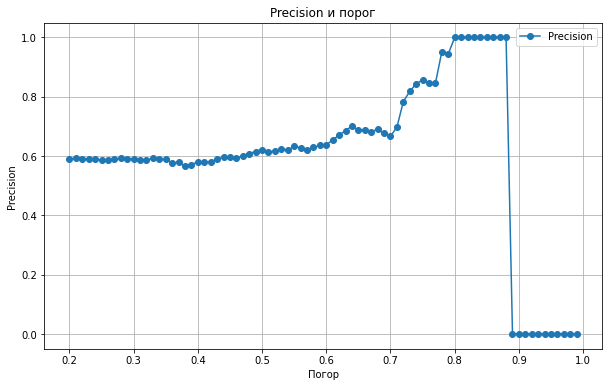

In [65]:
# Построение графика precision vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, marker='o', label='Precision')
plt.xlabel('Погор')
plt.ylabel('Precision')
plt.title('Precision и порог')
plt.legend()
plt.grid(True)
plt.show()

###### Модель №2

Модель №1 дала определенные результаты. Мы нашли порог, при котором исключается критическая ошибка. Для второй модели посмотрим на то, как распределяются значения для количественных (в виде гистограммы) и категориальных (в виде тепловой карты) столбцов

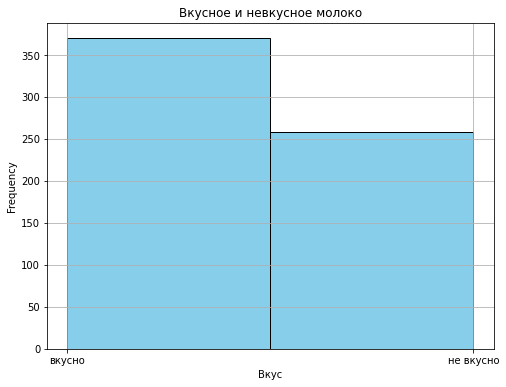

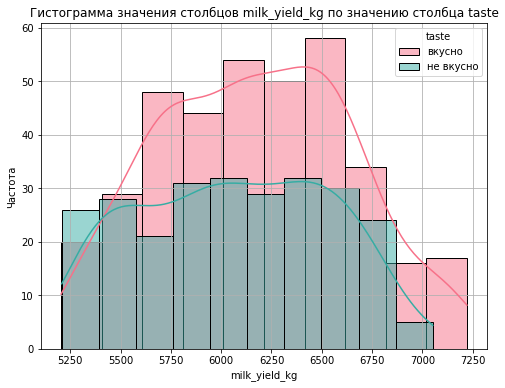

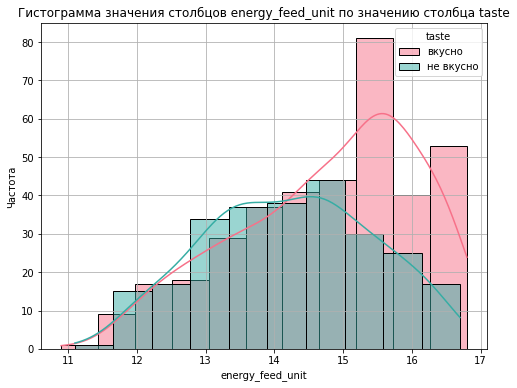

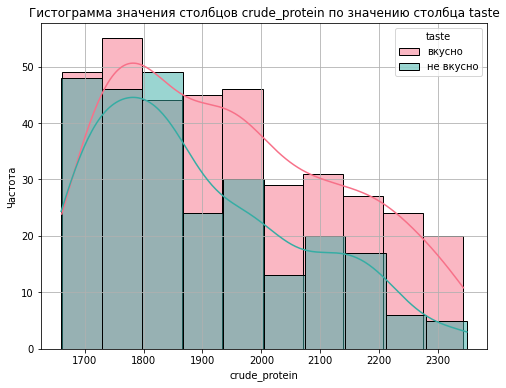

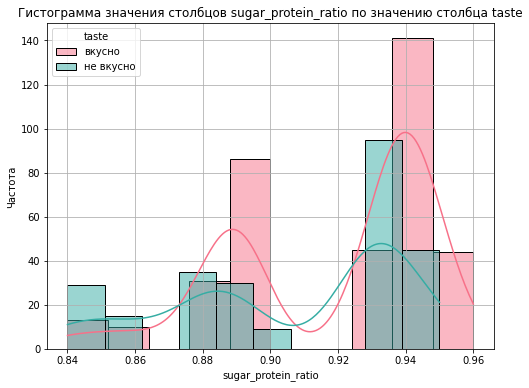

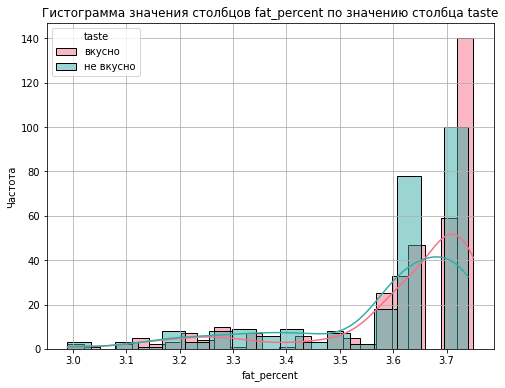

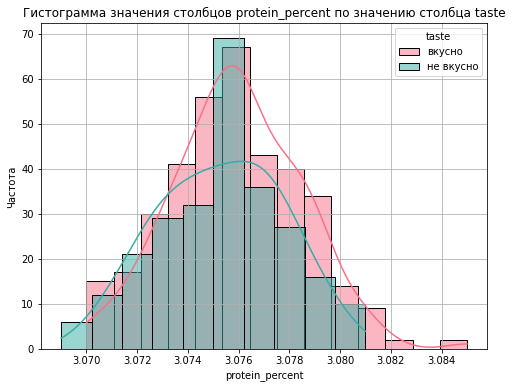

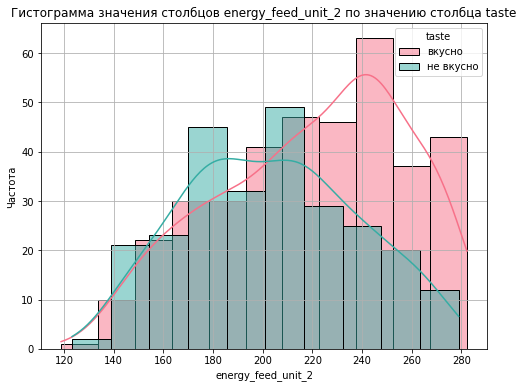

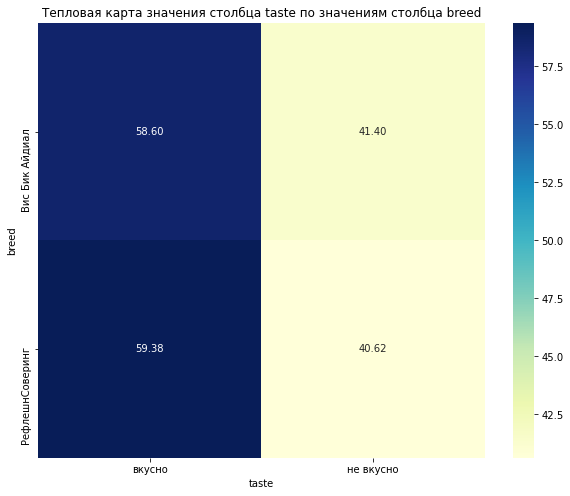

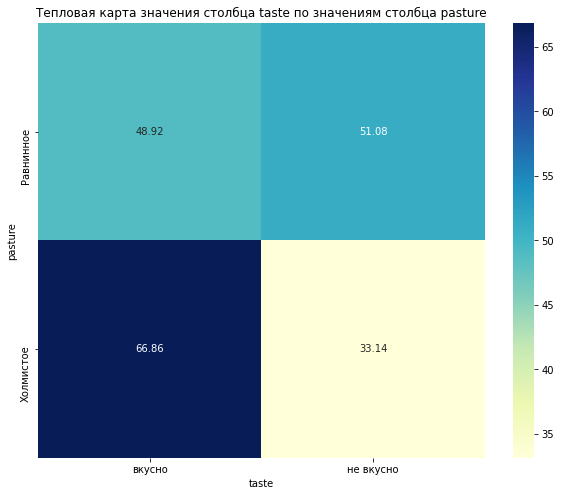

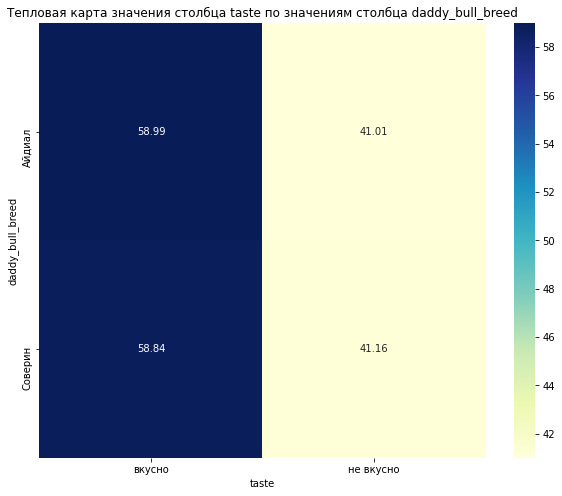

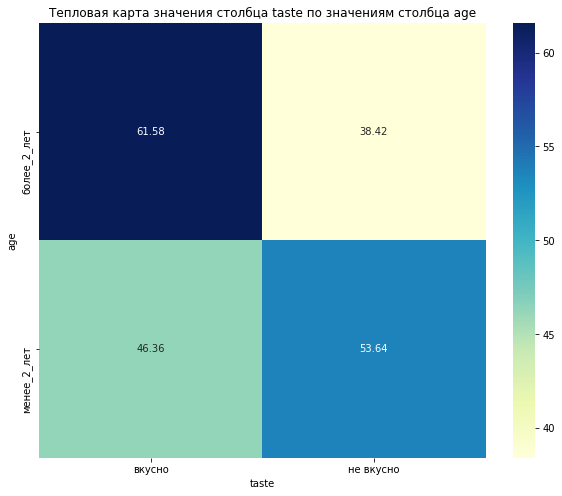

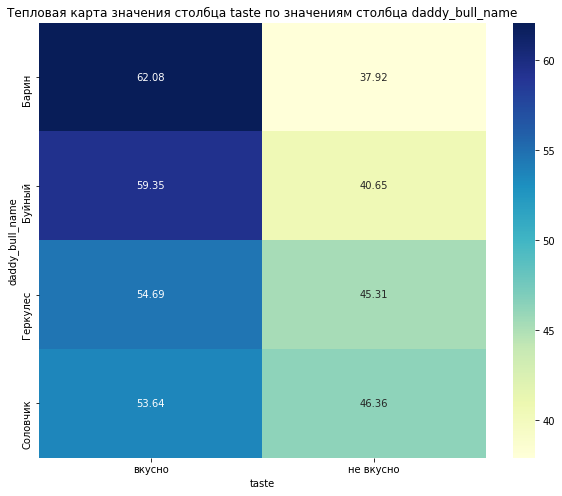

In [66]:
# Построение гистограммы для столбца 'taste'
plt.figure(figsize=(8, 6))
plt.hist(df_main['taste'], bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Вкус')
plt.ylabel('Frequency')
plt.title('Вкусное и невкусное молоко')
plt.grid(True)
plt.show()

def plot_histograms(df, target_column, selected_columns):
    taste_values = df[target_column].unique()
    colors = sns.color_palette("husl", n_colors=len(taste_values))
    
    for column in selected_columns:
        plt.figure(figsize=(8, 6))
        for i, taste_value in enumerate(taste_values):
            subset = df[df[target_column] == taste_value]
            sns.histplot(subset[column], kde=True, label=taste_value, color=colors[i])
        plt.title(f'Гистограмма значения столбцов {column} по значению столбца {target_column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.legend(title=target_column)
        plt.grid(True)
        plt.show()

# Пример использования функции
selected_columns = ['milk_yield_kg', 'energy_feed_unit', 'crude_protein',
                    'sugar_protein_ratio', 'fat_percent', 'protein_percent', 'energy_feed_unit_2']
plot_histograms(df_main, 'taste', selected_columns)


# Тепловая карта для категориальных признаков
def heatmap_categorical(df, target_column):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        if column != target_column:
            plt.figure(figsize=(10, 8))
            cross_tab = pd.crosstab(df[column], df[target_column], normalize='index') * 100
            sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap="YlGnBu")
            plt.title(f'Тепловая карта значения столбца {target_column} по значениям столбца {column}')
            plt.xlabel(target_column)
            plt.ylabel(column)
            plt.show()
            
# Построение тепловой карты для категориальных признаков
heatmap_categorical(df_main, 'taste')

Мы видим, что вкусное молоко чаще встречается в следующих случаях:
- При значении ЭКЕ от 15 единиц и выше
- При жирности молока 3.7% и выше
- При значении сырого протеина в корме от 1900
- При величине ЭКЕ в квадрате свыше 230
- При удое 5700 кг в год и выше чаще встречается вкусное молоко

Попробуем добавить категориальные столбцы по замеченным особенностям


При анализе тепловых карт можно заметить, что:
- Порода (в т.ч. порода папы быка) не сильно влияет на вкус, распределение у разных пород схожее
- Коровы, которые пасутся на холмистых пастбищах чаще дают вкусное молоко
- Коровы в возрасте более двух лет чаще дают вкусное молоко
- Молоко чаще вкусное у коров от папы быка Барин и Буйный. От папы Соловчик и Геркулес – меньше процент вкусного молока

In [67]:
# Добавление столбцов
df_main['efu_15'] = df_main['energy_feed_unit'].apply(lambda i: 0 if i <= 15 else 1)
df_main['fat_3.7'] = df_main['fat_percent'].apply(lambda i: 0 if i <= 3.7 else 1)
df_main['crude_protein_1900'] = df_main['crude_protein'].apply(lambda i: 0 if i <= 1900 else 1)
df_main['energy_feed_unit_2_230'] = df_main['energy_feed_unit_2'].apply(lambda i: 0 if i <= 230 else 1)
df_main['milk_yield_kg_5700'] = df_main['milk_yield_kg'].apply(lambda i: 0 if i <= 5700 else 1)

In [68]:
#посмотрим на обновленный датасет
df_main.head(10)

,id,milk_yield_kg,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,pasture,daddy_bull_breed,fat_percent,protein_percent,taste,age,energy_feed_unit_2,spr_0.92,daddy_bull_name,efu_15,fat_3.7,crude_protein_1900,energy_feed_unit_2_230,milk_yield_kg_5700
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,0,Буйный,0,0,0,0,1
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,0,Соловчик,0,0,1,0,0
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,0,Барин,0,0,0,0,1
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,0,Буйный,0,0,1,0,1
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,0,Барин,0,1,0,0,0
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет,161.29,0,Барин,0,0,0,0,0
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.48,3.077,вкусно,более_2_лет,174.24,0,Соловчик,0,0,0,0,1
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинное,Айдиал,3.55,3.076,вкусно,более_2_лет,216.09,1,Геркулес,0,0,0,0,1
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет,201.64,1,Буйный,0,1,1,0,1
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет,179.56,0,Барин,0,0,0,0,0


Создадим модель, добавим новые столбцы в признаки, и удалив коллинеарные с ними столбцы

In [69]:
X_5 = df_main.drop(['id', 'taste', 'daddy_bull_breed', 'sugar_protein_ratio', 'energy_feed_unit',
                    'energy_feed_unit_2', 'efu_15', 'fat_percent', 'milk_yield_kg'], axis=1)
y_5 = df_main['taste']
y_5 = y_5.apply(lambda i: 0 if i == "не вкусно" else 1)

# Разделение данных на обучающий и тестовый наборы
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(
    X_5, 
    y_5, 
    random_state=42,
    stratify=y_5
)

# Выбираем числовые признаки
numerical_cols = X_5_train.select_dtypes(include=['int64', 'float64']).columns

numerical_cols = X_5_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_5_train.select_dtypes(include=['object']).columns

# Масштабируем числовые признаки
scaler = StandardScaler()
X_5_train_scaled = X_5_train.copy()
X_5_test_scaled = X_5_test.copy()

X_5_train_scaled[numerical_cols] = scaler.fit_transform(X_5_train[numerical_cols])
X_5_test_scaled[numerical_cols] = scaler.transform(X_5_test[numerical_cols])

# Преобразуем категориальные признаки методом OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
X_5_train_encoded = encoder.fit_transform(X_5_train_scaled[cat_cols])
X_5_test_encoded = encoder.transform(X_5_test_scaled[cat_cols])

# Создаем DataFrame для закодированных категориальных признаков
encoded_cat_cols = encoder.get_feature_names(cat_cols)
X_5_train_encoded_df = pd.DataFrame(X_5_train_encoded, columns=encoded_cat_cols, index=X_5_train.index)
X_5_test_encoded_df = pd.DataFrame(X_5_test_encoded, columns=encoded_cat_cols, index=X_5_test.index)

# Объединяем числовые и закодированные категориальные признаки
X_5_train_final = pd.concat([X_5_train_scaled[numerical_cols], X_5_train_encoded_df], axis=1)
X_5_test_final = pd.concat([X_5_test_scaled[numerical_cols], X_5_test_encoded_df], axis=1)

# Создание объекта модели
clf2 = LogisticRegression()

# Обучение модели на обработанных и закодированных данных
clf2.fit(X_5_train_final, y_5_train)

# Получение прогнозов
y_pred_5 = clf2.predict(X_5_test_final)

In [70]:
print(f'Accuracy модели составляет {accuracy_score(y_5_test, y_pred_5)}')
print(f'Recall модели составляет {recall_score(y_5_test, y_pred_5)}')
print(f'Precision модели составляет {precision_score(y_5_test, y_pred_5)}')

Accuracy модели составляет 0.5732484076433121
Recall модели составляет 0.717391304347826
Precision модели составляет 0.616822429906542


Мы получили следующие метрики:
- Accuracy = 0.573 (57.3%) - минус 1.3%
- Recall = 0.717 (71.7%) - минус 3.3%
- Precision = 0.617 (61.7%) - минус 0.5%

###### Выбор модели
Метрики ухудшились. 
Далее мы используем результаты модели №1.
Ниже получим прогнозные значения в вероятностях от 0 до 1 для тестовой выборки

In [71]:
y_4_proba = clf1.predict_proba(X_4_test_final)[:,1]

In [72]:
data = pd.DataFrame(zip(y_4_test, y_4_proba),
             columns = ['y_valid', 'y_4_proba']).sort_values(by='y_4_proba',ascending=False)

print(data)

     y_valid  y_4_proba
124        1   0.882797
94         1   0.878150
7          1   0.876588
138        1   0.864857
154        1   0.847417
..       ...        ...
155        1   0.247321
79         1   0.240850
90         1   0.217987
64         0   0.206319
121        0   0.169111

[157 rows x 2 columns]


Видим, что у нас есть значения вероятностей более 0.8

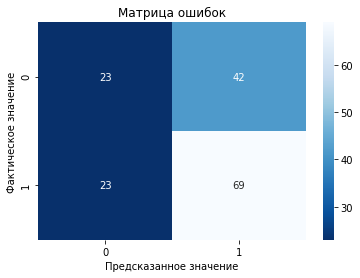

In [73]:
cm = confusion_matrix(y_4_test, y_pred_4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанное значение')
plt.ylabel('Фактическое значение')
plt.show()

При значении порога 0.5 имеются 42 критические ошибки Precision, попробуем посмотреть на значение метрики при различных порогах

###### Прогнозирование вкуса для коров, доступных для покупки

In [77]:
X_2_buy = df_buy.drop(['daddy_bull_breed', 'spr_0.92', 'energy_feed_unit_2', 'milk_yield_kg'], axis=1)

# Получение списка столбцов в том же порядке
columns_order = X_4_train_scaled.columns.tolist()
# Переупорядочивание столбцов в X_buy
X_2_buy = X_2_buy.reindex(columns=columns_order)

# Выбираем числовые признаки
numerical_cols = X_2_buy.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_2_buy.select_dtypes(include=['object']).columns

# Масштабируем числовые признаки
X_2_buy_scaled = X_2_buy.copy()
X_2_buy_scaled[numerical_cols] = scaler_clf1.transform(X_2_buy[numerical_cols])

# Преобразуем категориальные признаки методом OneHotEncoder
X_2_buy_encoded = encoder_clf1.transform(X_2_buy_scaled[cat_cols])

# Создаем DataFrame для закодированных категориальных признаков
encoded_cat_cols = encoder.get_feature_names(cat_cols)
X_2_buy_encoded_df = pd.DataFrame(X_2_buy_encoded, columns=encoded_cat_cols, index=X_2_buy_scaled.index)

# Объединяем числовые и закодированные категориальные признаки
X_2_buy_final = pd.concat([X_2_buy_scaled[numerical_cols], X_2_buy_encoded_df], axis=1)

# Получение прогнозов
df_buy['predicted_taste'] = clf1.predict(X_2_buy_final)

# Получение вероятностей принадлежности к классу "вкусно"
df_buy['tasty_proba'] = clf1.predict_proba(X_2_buy_final)[:, 1]

Посмотрим на список коров, которых отсортирован по наибольшей вероятности вкусного молока

In [79]:
df_buy.sort_values(by='tasty_proba',ascending=False)

,breed,pasture,daddy_bull_breed,daddy_bull_name,fat_percent,protein_percent,age,crude_protein,sugar_protein_ratio,energy_feed_unit,energy_feed_unit_2,spr_0.92,milk_yield_kg,predicted_taste,tasty_proba
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6327.032725,1,0.810294
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6105.057167,1,0.807449
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6274.317308,1,0.728805
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6320.759530,1,0.723613
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6478.851625,1,0.720233
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6596.914336,1,0.707761
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6596.914336,1,0.707761
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6261.815649,1,0.668574
14,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6261.815649,1,0.668574
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6261.815649,1,0.668574


In [86]:
#добавим столбцы с вкусом при различных порогах
df_buy['taste_thr_0.5'] = df_buy['tasty_proba'].apply(lambda i: "не вкусно" if i < 0.5 else "вкусно")
df_buy['taste_thr_0.8'] = df_buy['tasty_proba'].apply(lambda i: "не вкусно" if i < 0.8 else "вкусно")

In [87]:
df_buy.sort_values(by='tasty_proba',ascending=False)

,breed,pasture,daddy_bull_breed,daddy_bull_name,fat_percent,protein_percent,age,crude_protein,sugar_protein_ratio,energy_feed_unit,energy_feed_unit_2,spr_0.92,milk_yield_kg,predicted_taste,tasty_proba,taste_thr_0.5,taste_thr_0.83,taste_thr_0.8
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6327.032725,1,0.810294,вкусно,вкусно,вкусно
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6105.057167,1,0.807449,вкусно,вкусно,вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6274.317308,1,0.728805,вкусно,не вкусно,не вкусно
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6320.759530,1,0.723613,вкусно,не вкусно,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6478.851625,1,0.720233,вкусно,не вкусно,не вкусно
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6596.914336,1,0.707761,вкусно,не вкусно,не вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6596.914336,1,0.707761,вкусно,не вкусно,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6261.815649,1,0.668574,вкусно,не вкусно,не вкусно
14,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6261.815649,1,0.668574,вкусно,не вкусно,не вкусно
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6261.815649,1,0.668574,вкусно,не вкусно,не вкусно


Видим, что у нас доступны для продажи пятнадцать коров, у которых вкусное молоко по прогнозу с порогом 0.5, и только две коровы с вкусным молоком по прогнозу с порогом 0.8 (т.е. гарантированно вкусное молоко)
Как минимум две коровы можно рассмотреть к покупке с наименьшим риском

Для модели №1 построим тепловую карту с коэффициентами, чтобы дать дальнейшие рекомендации, при покупке коров, улучшении параметров корма для увеличения вероятности получить вкусное молоко

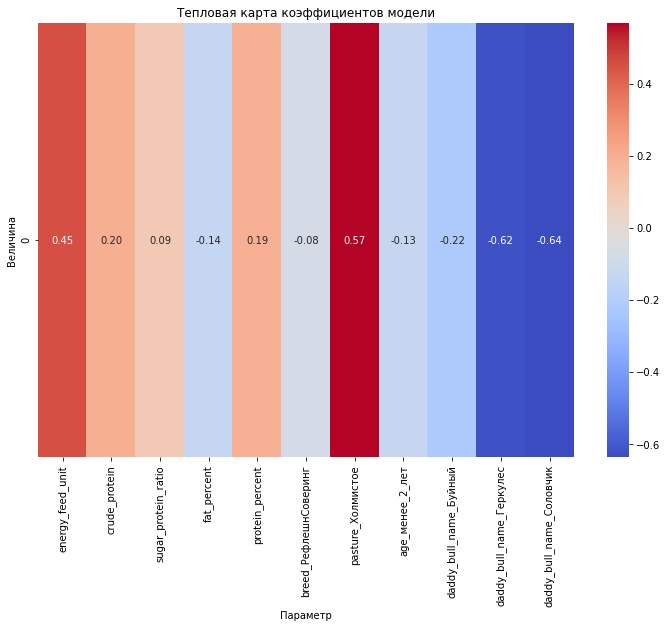

In [89]:
# Получение коэффициентов модели
coefficients = clf1.coef_

# Создание DataFrame для коэффициентов и их соответствующих признаков
coef_df = pd.DataFrame(coefficients, columns=X_4_train_final.columns)

# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(coef_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта коэффициентов модели')
plt.xlabel('Параметр')
plt.ylabel('Величина')
plt.show()

In [92]:
# Получаем коэффициенты модели
coefficients = clf1.coef_[0]

# Применяем экспоненту к коэффициентам
odds_ratios = np.exp(coefficients)

# Выводим результаты
coef_df = pd.DataFrame({
    'Признак': X_4_train_final.columns,
    'Коэффициент': coefficients,
    'Отношение шансов': odds_ratios
})
print(coef_df)

                     Признак  Коэффициент  Отношение шансов
0           energy_feed_unit     0.451635          1.570879
1              crude_protein     0.198854          1.220003
2        sugar_protein_ratio     0.093859          1.098405
3                fat_percent    -0.136397          0.872497
4            protein_percent     0.194127          1.214250
5      breed_РефлешнСоверинг    -0.075543          0.927240
6          pasture_Холмистое     0.569229          1.766904
7            age_менее_2_лет    -0.131206          0.877038
8     daddy_bull_name_Буйный    -0.220522          0.802100
9   daddy_bull_name_Геркулес    -0.619214          0.538367
10  daddy_bull_name_Соловчик    -0.637550          0.528586


По тепловой карте и экспонентам к коэффициентам логистической регрессии мы видим, что наибольший "вклад" во вкус молока несут следующие характеристики:
- Холмистое пастбище
- ЭКЕ

Можно рассмотреть к покупке коров не только с вероятностью 'tasty_proba' 0.8, но также и тех, у кого показатель выше 0.5 и которые паслись на равнинных пастбищах. Можно также увеличить показатель ЭКЕ для этих коров

## Шаг 7. Итоговые выводы

Сформируем таблицу с коровами для фермера, без категориальных столбцов, добавленных нами

In [94]:
df_buy_for_farmer = df_buy.drop(['predicted_taste', ], axis=1)
df_buy_for_farmer

,breed,pasture,daddy_bull_breed,daddy_bull_name,fat_percent,protein_percent,age,crude_protein,sugar_protein_ratio,energy_feed_unit,energy_feed_unit_2,spr_0.92,milk_yield_kg,tasty_proba,taste_thr_0.5,taste_thr_0.83,taste_thr_0.8
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6596.914336,0.707761,вкусно,не вкусно,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6274.317308,0.728805,вкусно,не вкусно,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6261.815649,0.668574,вкусно,не вкусно,не вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6690.414116,0.560739,вкусно,не вкусно,не вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6541.741649,0.608001,вкусно,не вкусно,не вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6600.472506,0.161834,не вкусно,не вкусно,не вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6596.914336,0.707761,вкусно,не вкусно,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6478.851625,0.720233,вкусно,не вкусно,не вкусно
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6261.815649,0.668574,вкусно,не вкусно,не вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6327.032725,0.810294,вкусно,вкусно,вкусно


Выведем перечень коров, которые дадут по прогнозам более 6000 кг удоя и молоко которых будет вкусным (при пороге 0.5)

In [95]:
df_buy_for_farmer.query('milk_yield_kg >= 6000 & tasty_proba >= 0.5')

,breed,pasture,daddy_bull_breed,daddy_bull_name,fat_percent,protein_percent,age,crude_protein,sugar_protein_ratio,energy_feed_unit,energy_feed_unit_2,spr_0.92,milk_yield_kg,tasty_proba,taste_thr_0.5,taste_thr_0.83,taste_thr_0.8
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6596.914336,0.707761,вкусно,не вкусно,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6274.317308,0.728805,вкусно,не вкусно,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6261.815649,0.668574,вкусно,не вкусно,не вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6690.414116,0.560739,вкусно,не вкусно,не вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6541.741649,0.608001,вкусно,не вкусно,не вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6596.914336,0.707761,вкусно,не вкусно,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6478.851625,0.720233,вкусно,не вкусно,не вкусно
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6261.815649,0.668574,вкусно,не вкусно,не вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6327.032725,0.810294,вкусно,вкусно,вкусно
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,2019.947532,0.958744,15.276162,233.361138,1,6105.057167,0.807449,вкусно,вкусно,вкусно


Тем не менее это не исключает риск получить невкусное молоко, т.к. при пороге 0.5 метрика Precision была 0.622. Наименьшим риском получить невкусное молоко является покупка коровы под номером 9 и 13

Как уже отмечали, самая высокая вероятность вкусного молока у коровы под номером 9 и 13. При этом возраст коровы №13 - менее двух лет и это очень перспективная покупка
При этом коровы под номерами 1, 2, 4, 7, 8, 14, 18, 19 паслись на равнинных пастбищах. Хоть и по прогнозу их молоко не во всех случаях гарантирует желаемый фермером вкус, но улучшить вкус можно переводом данных коров на холмистые пастбища в случае покупки. 
Т.к. для заказчика важен вкус молока, то рекомендуется отобрать коров для покупки под номером 9 и 13 (риск минимальный, практически отсутствует). Чуть больший риск - у коров под номерами 1, 16, 7, 0, 6.
И "темные перспективные лошадки" - 1, 2, 4, 7, 8, 14, 18, 19, но только в случае дальнейшего выпаса их на холмистых пастбищах (если это возможно).

Также для увеличения вероятности получить вкусное молоко можно дать следующую рекомендацию. В случае покупки коров 1, 2, 4, 7, 8, 14, 18, 19 можно рекомендовать увеличить значение ЭКЕ (не среднее значение +5%, а +10% или даже +15%). Это также положительно скажется на удое, если не уменьшать сахаро-протеиновое соотношение ниже 0.92.

- В ходе работы были созданы три модели линейной регрессии и две модели логистической регресии.
- Для улучшения моделей были добавлены новые признаки, как количественные, так и категориальные. Признаки были отобраны после построения гистограмм, диаграмм рассеяния по группам в ходе исследовательского анализа данных. Проводился и корреляционный анализ. Нельзя забывать о предобработке: удалении дубликатов и работой с выбросами. Для отбора выбросов был построены ящики с усами.
- Для модели логистической регрессии также были построены тепловые карты, чтобы видеть распределение вкусного молока в группах.
- Улучшить имеющиеся результаты регрессионных моделей можно путем поиска новых признаков. Но в рамках имеющихся данных дальнейшее улучшение сложно

Для оценки линейной регрессии использовались следующие метрики:
- R2 - коэффициент детерминации, который измеряет пропорцию дисперсии зависимой переменной, которая объясняется моделью. Значение R2 находится между 0 и 1, где 1 указывает на идеальное соответствие модели данным.
- MSE - среднеквадратичная ошибка, которая измеряет среднее значение квадратов разностей между прогнозируемыми и фактическими значениями. Чем ниже значение MSE, тем лучше модель.
- RMSE - это корень из среднеквадратичной ошибки. Он представляет собой квадратный корень из MSE и имеет ту же размерность, что и исходные данные. RMSE также показывает среднее отклонение прогнозов модели от фактических значений.
- MAE - это среднее абсолютное отклонение между прогнозируемыми и фактическими значениями. MAE измеряет среднее абсолютное значение ошибки без учета ее направления. Как и MSE, чем меньше значение MAE, тем лучше модель.

- Также мы анализировали остатки. Анализ остатков - это процесс оценки того, насколько хорошо регрессионная модель соответствует данным путем анализа остатков, то есть разницы между фактическими значениями зависимой переменной и прогнозами модели. Предоставляет информацию о качестве и адекватности модели, а также о возможных улучшениях, которые могут быть сделаны для повышения ее точности. Остатки должны иметь график с нормальным распределением, с пиком около нуля.

Для оценки логистической регрессии использовались следующие метрики:
- Accuracy (точность): мера того, насколько часто модель правильно классифицирует данные, то есть отношение числа правильно классифицированных наблюдений ко всем наблюдениям.
- Precision (точность): мера того, насколько точно модель классифицирует положительные классы, то есть отношение числа правильно классифицированных положительных наблюдений к общему числу наблюдений, которые модель предсказала как положительные. Формула: TP/(TP+FP). Цель: максимизировать precision, чтобы уменьшить количество ложноположительных предсказаний. В нашей задаче наиважная метрика, т.к. для фермера критично иметь ложноположительное предсказание вкуса молока.
- Recall (полнота): мера того, насколько полно модель обнаруживает положительные классы, то есть отношение числа правильно классифицированных положительных наблюдений к общему числу фактически положительных наблюдений в данных. Формула: TP/(TP+FN). Цель: максимизировать recall, чтобы уменьшить количество ложноотрицательных предсказаний.